# Clutering con dataset de estudio y redución dimensionalidad
## 1. Librerias y configuraciones previas

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min


# Operaciones matemáticas o estadíticas
import math

from datetime import datetime, timedelta
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

## 2. Funciones

In [2]:
def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

In [3]:
def silhouette_analysis(X, range_n_clusters):
    #range_n_clusters = [10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21]

    
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1) = plt.subplots(1, 1)
        fig.set_size_inches(19, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(("Silhouette analysis for %s clustering on sample data "
                      "with n_clusters = %d, score = %.3f" % (clusterer.__class__.__name__, n_clusters,silhouette_avg)),
                     fontsize=14, fontweight='bold')

## 3. Carga del dataset

In [4]:
df=pd.read_excel('BD_TRABAJO_GRADO.xlsx')
display(df)

Edad Genero Estado_Civil Tpo_Contrato Estado_Empleado Fecha_Ingreso  \
0        36      M          NaN         Fijo        Retirado    2018-02-03   
1        37      M          NaN         Fijo        Retirado    2018-08-02   
2        40      M          NaN         Fijo        Retirado    2018-08-13   
3        35      M          NaN         Fijo        Retirado    2019-02-23   
4        42      F          NaN         Fijo        Retirado    2018-02-17   
...     ...    ...          ...          ...             ...           ...   
11224    22      M          NaN         Fijo          Activo    2022-07-01   
11225    24      F          NaN         Fijo          Activo    2022-06-24   
11226    23      M          NaN   Indefinido          Activo    2022-02-02   
11227    23      F          NaN         Fijo          Activo    2022-08-25   
11228    43      F          NaN         Fijo          Activo    2022-07-08   

      Fecha_Retiro  Dias_Permanencia Motivo_Retiro               Tipo_Cargo  \
0       2018-02-19                16      Renuncia  Operativos y Auxiliares   
1       2020-11-06               827      Renuncia  Operativos y Auxiliares   
2       2019-02-07               178      Renuncia  Operativos y Auxiliares   
3       2019-09-20               209      Renuncia  Operativos y Auxiliares   
4       2019-07-22               520      Renuncia  Operativos y Auxiliares   
...            ...               ...           ...                      ...   
11224   2022-12-15               167           NaN  Operativos y Auxiliares   
11225   2022-12-15               174           NaN  Operativos y Auxiliares   
11226   2022-12-15               316           NaN  Operativos y Auxiliares   
11227   2022-12-15               112           NaN  Operativos y Auxiliares   
11228   2022-12-15               160           NaN  Operativos y Auxiliares   

       Responsabilidad  Servicio_Cliente  Madurez_Emocional  Productividad  \
0                   42                25                 20             10   
1                   16                11                 31             14   
2                   33                22                 21             13   
3                   24                21                 25             17   
4                   40                23                 31             48   
...                ...               ...                ...            ...   
11224               22                22                 25             14   
11225               13                27                 18              3   
11226               32                28                 13             34   
11227                9                20                 18             11   
11228               38                20                 16             15   

       Honestidad  Compromiso  Desempeño_Seguro ERI  
0              23          21                37  PS  
1               8           3                15  PS  
2              22          20                42  PS  
3              21           7                17  PS  
4              25          40                23  PS  
...           ...         ...               ...  ..  
11224          14           9                39  DP  
11225           3          21                43  DP  
11226           4          13                21  FP  
11227          16          15                11  DP  
11228          16           2                21  DP  

[11229 rows x 18 columns]

In [5]:
#Elimine las columnas 'Estado_Civil' del Df
df = df.drop(columns=['Estado_Civil'])
df.head(5)

Edad Genero Tpo_Contrato Estado_Empleado Fecha_Ingreso Fecha_Retiro  \
0    36      M         Fijo        Retirado    2018-02-03   2018-02-19   
1    37      M         Fijo        Retirado    2018-08-02   2020-11-06   
2    40      M         Fijo        Retirado    2018-08-13   2019-02-07   
3    35      M         Fijo        Retirado    2019-02-23   2019-09-20   
4    42      F         Fijo        Retirado    2018-02-17   2019-07-22   

   Dias_Permanencia Motivo_Retiro               Tipo_Cargo  Responsabilidad  \
0                16      Renuncia  Operativos y Auxiliares               42   
1               827      Renuncia  Operativos y Auxiliares               16   
2               178      Renuncia  Operativos y Auxiliares               33   
3               209      Renuncia  Operativos y Auxiliares               24   
4               520      Renuncia  Operativos y Auxiliares               40   

   Servicio_Cliente  Madurez_Emocional  Productividad  Honestidad  Compromiso  \
0                25                 20             10          23          21   
1                11                 31             14           8           3   
2                22                 21             13          22          20   
3                21                 25             17          21           7   
4                23                 31             48          25          40   

   Desempeño_Seguro ERI  
0                37  PS  
1                15  PS  
2                42  PS  
3                17  PS  
4                23  PS

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11229 entries, 0 to 11228
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Edad               11229 non-null  int64         
 1   Genero             11229 non-null  object        
 2   Tpo_Contrato       11229 non-null  object        
 3   Estado_Empleado    11229 non-null  object        
 4   Fecha_Ingreso      11229 non-null  datetime64[ns]
 5   Fecha_Retiro       11229 non-null  datetime64[ns]
 6   Dias_Permanencia   11229 non-null  int64         
 7   Motivo_Retiro      5228 non-null   object        
 8   Tipo_Cargo         11229 non-null  object        
 9   Responsabilidad    11229 non-null  int64         
 10  Servicio_Cliente   11229 non-null  int64         
 11  Madurez_Emocional  11229 non-null  int64         
 12  Productividad      11229 non-null  int64         
 13  Honestidad         11229 non-null  int64         
 14  Compro

In [7]:
#Realizo un describe sobre las columnas Nmericas
df.describe()

Edad  Dias_Permanencia  Responsabilidad  Servicio_Cliente  \
count  11229.000000      11229.000000     11229.000000      11229.000000   
mean      32.083088        602.815389        25.902574         22.038472   
std        7.661952        548.907610         9.035197          9.111828   
min       18.000000          0.000000         1.000000          1.000000   
25%       26.000000        105.000000        20.000000         16.000000   
50%       31.000000        360.000000        26.000000         20.000000   
75%       37.000000       1122.000000        33.000000         27.000000   
max       82.000000       1804.000000        48.000000         48.000000   

       Madurez_Emocional  Productividad    Honestidad    Compromiso  \
count       11229.000000   11229.000000  11229.000000  11229.000000   
mean           19.393980      12.523555     15.327099     15.080150   
std             7.021666       6.385582      5.583878     14.213528   
min             1.000000       1.000000      1.000000      1.000000   
25%            15.000000       9.000000     12.000000      5.000000   
50%            20.000000      12.000000     16.000000     11.000000   
75%            24.000000      15.000000     19.000000     20.000000   
max            48.000000      48.000000     48.000000     48.000000   

       Desempeño_Seguro  
count      11229.000000  
mean          21.211239  
std           10.861136  
min            1.000000  
25%           14.000000  
50%           20.000000  
75%           29.000000  
max           48.000000

In [8]:
#Reemplazamos valores NAN por N/A
df['Motivo_Retiro'].replace(np.nan,'NO APLICA',inplace=True)

In [9]:
#Dividimos el Dataset segun el valor de la columna estado
dfRetirados= df[df['Estado_Empleado']=='Retirado']
dfActivos= df[df['Estado_Empleado']=='Activo']
print("El dataset de Retirados quedo con",dfRetirados.shape[0],"Registros y",dfRetirados.shape[1],"Columnas")
print("El dataset de Activos quedo con",dfActivos.shape[0],"Registros y",dfActivos.shape[1],"Columnas\n")

El dataset de Retirados quedo con 5228 Registros y 17 Columnas
El dataset de Activos quedo con 6001 Registros y 17 Columnas



# Visualizacion Dataframe Activos

In [10]:
#Elimino la variable Motivo del retiro y que para este caso no aplica porque trtabajo solo con personal activo
dfActivos = dfActivos.drop(['Motivo_Retiro', 'Estado_Empleado'], axis=1)
dfActivos.head()

Edad Genero Tpo_Contrato Fecha_Ingreso Fecha_Retiro  Dias_Permanencia  \
5228    19      F         Fijo    2022-06-02   2022-12-15               196   
5229    20      M   Indefinido    2022-08-17   2022-12-15               120   
5230    20      F   Indefinido    2022-10-04   2022-12-15                72   
5231    20      F   Indefinido    2022-09-01   2022-12-15               105   
5232    20      F   Indefinido    2021-11-17   2022-12-15               393   

                   Tipo_Cargo  Responsabilidad  Servicio_Cliente  \
5228   Practicante / Aprendiz               15                43   
5229  Operativos y Auxiliares               26                39   
5230  Operativos y Auxiliares               24                16   
5231  Operativos y Auxiliares               23                24   
5232  Operativos y Auxiliares               25                 9   

      Madurez_Emocional  Productividad  Honestidad  Compromiso  \
5228                 28              9          16           9   
5229                 22             22          14          13   
5230                 14             11          10           7   
5231                 33             13          15           9   
5232                 19              7          15          13   

      Desempeño_Seguro ERI  
5228                 5  PS  
5229                38  PS  
5230                30  DP  
5231                17  PS  
5232                18  DP

In [11]:
#Volvi a Calcular los dias de Permanencia hasta el dia de Hoy y la puse en la fecha de retiro
import datetime as dt
today = dt.date.today()
today = dt.datetime.combine(dt.date.today(), dt.datetime.min.time())
dfActivos["Fecha_Retiro"] = today
dfActivos["Fecha_Ingreso"] = pd.to_datetime(dfActivos["Fecha_Ingreso"])
dfActivos["Dias_Permanencia"] = (today - dfActivos["Fecha_Ingreso"]).dt.days
dfActivos.head()

Edad Genero Tpo_Contrato Fecha_Ingreso Fecha_Retiro  Dias_Permanencia  \
5228    19      F         Fijo    2022-06-02   2023-05-24               356   
5229    20      M   Indefinido    2022-08-17   2023-05-24               280   
5230    20      F   Indefinido    2022-10-04   2023-05-24               232   
5231    20      F   Indefinido    2022-09-01   2023-05-24               265   
5232    20      F   Indefinido    2021-11-17   2023-05-24               553   

                   Tipo_Cargo  Responsabilidad  Servicio_Cliente  \
5228   Practicante / Aprendiz               15                43   
5229  Operativos y Auxiliares               26                39   
5230  Operativos y Auxiliares               24                16   
5231  Operativos y Auxiliares               23                24   
5232  Operativos y Auxiliares               25                 9   

      Madurez_Emocional  Productividad  Honestidad  Compromiso  \
5228                 28              9          16           9   
5229                 22             22          14          13   
5230                 14             11          10           7   
5231                 33             13          15           9   
5232                 19              7          15          13   

      Desempeño_Seguro ERI  
5228                 5  PS  
5229                38  PS  
5230                30  DP  
5231                17  PS  
5232                18  DP

In [12]:
#Identificamos las variables categoricas y convertimos en lista solo para Df Activos
CatColsAct = dfActivos.select_dtypes(include=["object"]).columns.tolist()
dfActivos[CatColsAct].columns

Index(['Genero', 'Tpo_Contrato', 'Tipo_Cargo', 'ERI'], dtype='object')

In [13]:
#Identificamos las variables Numericas y convertimos en lista solo para Df Activos
NumColsAct = dfActivos.select_dtypes(include=['int64','float64']).columns.tolist()
df[NumColsAct].head()

Edad  Dias_Permanencia  Responsabilidad  Servicio_Cliente  \
0    36                16               42                25   
1    37               827               16                11   
2    40               178               33                22   
3    35               209               24                21   
4    42               520               40                23   

   Madurez_Emocional  Productividad  Honestidad  Compromiso  Desempeño_Seguro  
0                 20             10          23          21                37  
1                 31             14           8           3                15  
2                 21             13          22          20                42  
3                 25             17          21           7                17  
4                 31             48          25          40                23

In [14]:
#visualizaos todo el contenido por cada variable
for ind, col in enumerate(dfActivos[CatColsAct].columns):
    print('==============================')
    print(df.groupby(col).Genero.count().sort_values(ascending=False))

Genero
M    7619
F    3610
Name: Genero, dtype: int64
Tpo_Contrato
Fijo          7679
Indefinido    3550
Name: Genero, dtype: int64
Tipo_Cargo
Operativos y Auxiliares                  9264
Asistentes y Técnicos                     967
Analistas y Profesionales                 432
Practicante / Aprendiz                    258
Líderes, Coordinadores y Supervisores     247
Jefes                                      42
Gerentes y Directores                      19
Name: Genero, dtype: int64
ERI
DP    5618
PS    4777
FP     812
NV      22
Name: Genero, dtype: int64


In [15]:
#realizo un describe solo a variabls numericas Para estos porcentajes
dfActivos.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.975])

Edad  Dias_Permanencia  Responsabilidad  Servicio_Cliente  \
count  6001.000000       6001.000000      6001.000000       6001.000000   
mean     32.164806       1108.875687        26.205132         22.007165   
std       7.664137        516.993138         9.025044          9.062787   
min      18.000000        183.000000         1.000000          1.000000   
1%       20.000000        189.000000         4.000000          6.000000   
10%      23.000000        295.000000        14.000000         12.000000   
20%      25.000000        439.000000        19.000000         15.000000   
30%      27.000000        902.000000        21.000000         16.000000   
40%      29.000000       1022.000000        24.000000         18.000000   
50%      31.000000       1253.000000        26.000000         20.000000   
60%      33.000000       1360.000000        29.000000         23.000000   
70%      35.000000       1463.000000        32.000000         25.000000   
80%      39.000000       1563.000000        34.000000         30.000000   
90%      43.000000       1723.000000        38.000000         37.000000   
97.5%    50.000000       1895.000000        42.000000         41.000000   
max      64.000000       1964.000000        48.000000         48.000000   

       Madurez_Emocional  Productividad   Honestidad   Compromiso  \
count        6001.000000    6001.000000  6001.000000  6001.000000   
mean           19.391768      12.389935    15.284786    14.630562   
std             7.034486       6.177696     5.430382    13.942991   
min             1.000000       1.000000     1.000000     1.000000   
1%              2.000000       1.000000     1.000000     1.000000   
10%            10.000000       5.000000     8.000000     1.000000   
20%            13.000000       8.000000    11.000000     3.000000   
30%            16.000000      10.000000    13.000000     6.000000   
40%            18.000000      11.000000    14.000000     8.000000   
50%            20.000000      12.000000    16.000000    11.000000   
60%            21.000000      14.000000    17.000000    13.000000   
70%            24.000000      15.000000    18.000000    16.000000   
80%            25.000000      16.000000    20.000000    21.000000   
90%            28.000000      18.000000    22.000000    42.000000   
97.5%          32.000000      22.000000    25.000000    48.000000   
max            48.000000      48.000000    48.000000    48.000000   

       Desempeño_Seguro  
count       6001.000000  
mean          21.658724  
std           10.972808  
min            1.000000  
1%             1.000000  
10%            8.000000  
20%           12.000000  
30%           16.000000  
40%           18.000000  
50%           20.000000  
60%           23.000000  
70%           26.000000  
80%           32.000000  
90%           37.000000  
97.5%         47.000000  
max           48.000000

<Axes: xlabel='Desempeño_Seguro'>

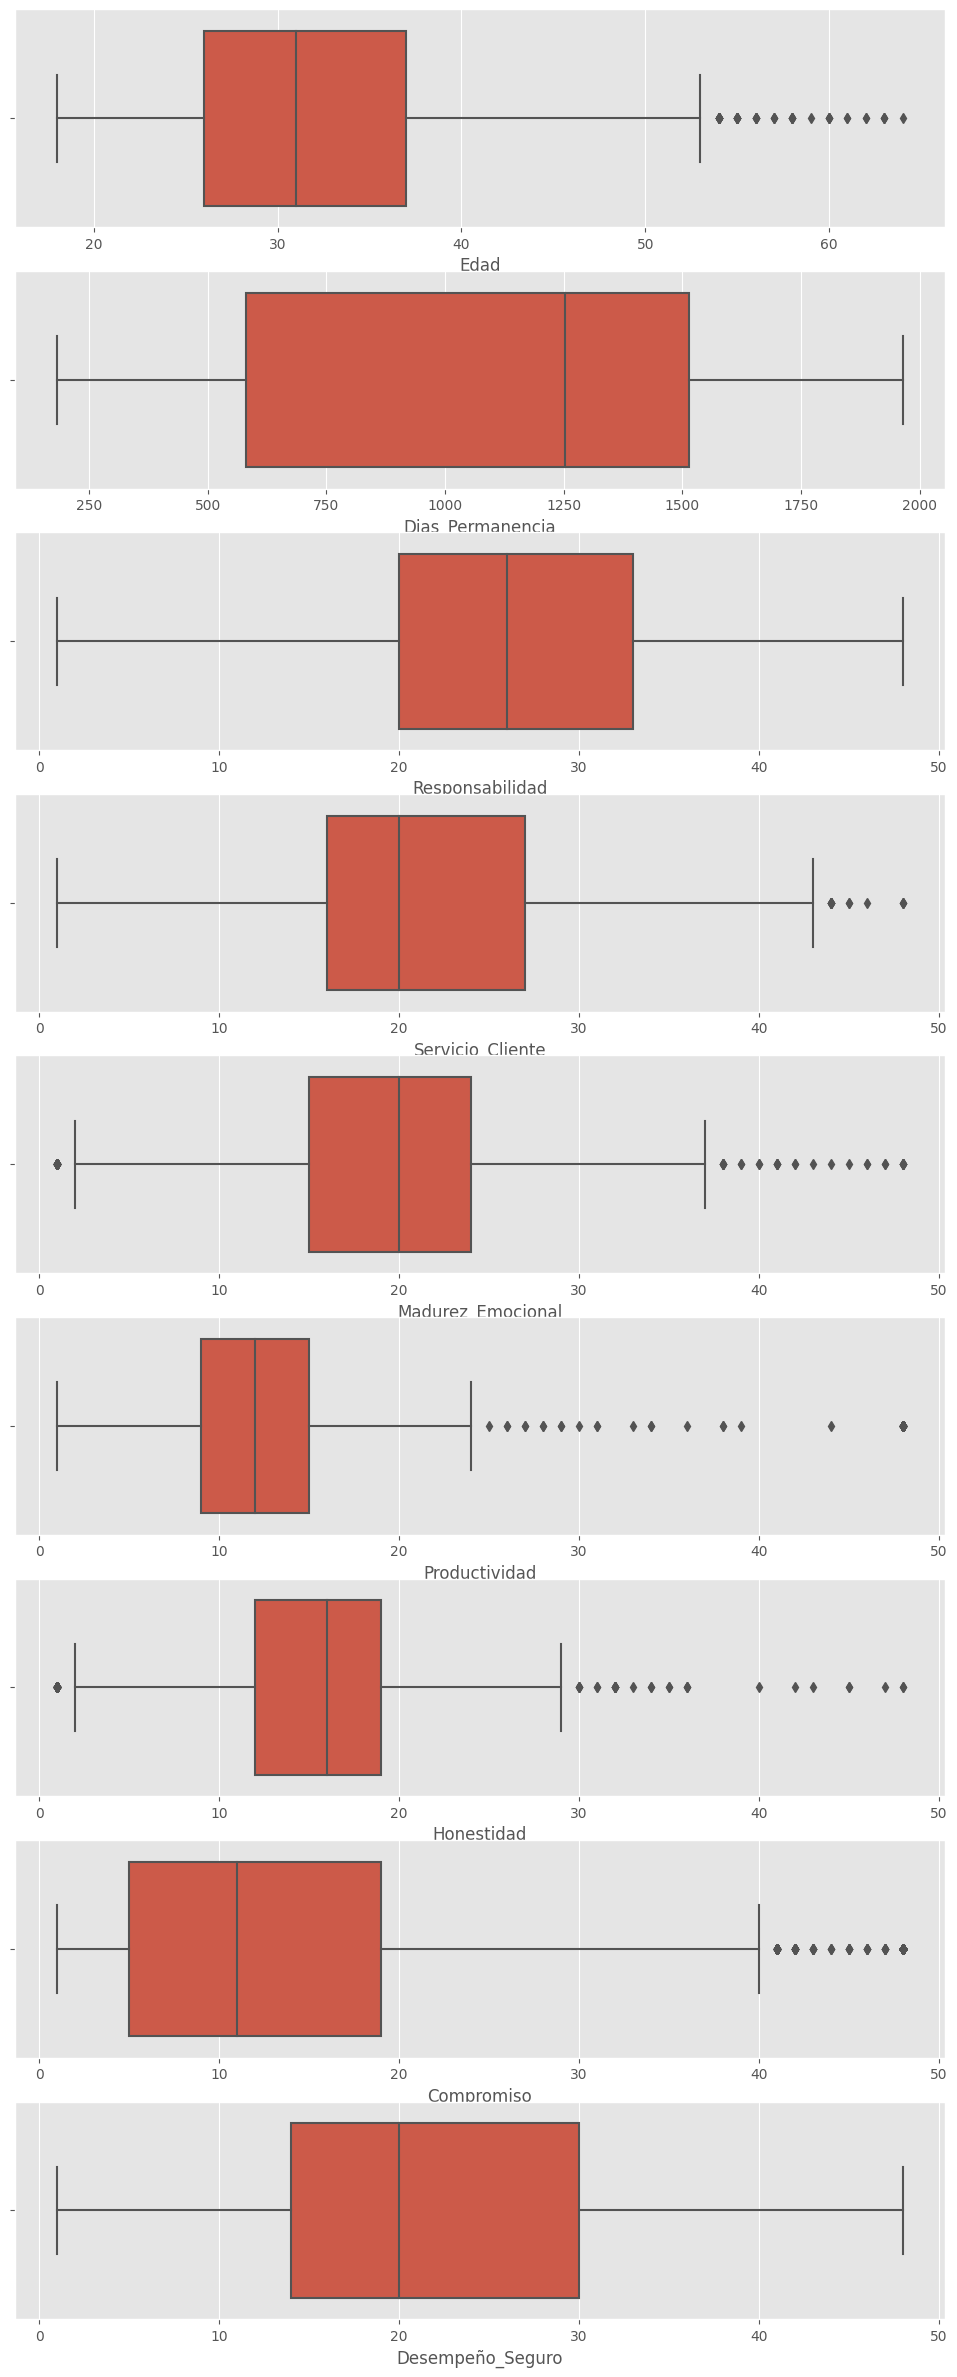

In [16]:
#identificamos valores Atipicos en variables Numericas para eso usamos grafico de bigotes
#Laura tendra que definirme si recortamos los intervalos
plt.rcParams['figure.figsize'] = (12,30)
fig, axs = plt.subplots(9, 1)

sns.boxplot(ax=axs[0], x=dfActivos.Edad)
sns.boxplot(ax=axs[1], x=dfActivos.Dias_Permanencia)
sns.boxplot(ax=axs[2], x=dfActivos.Responsabilidad)
sns.boxplot(ax=axs[3], x=dfActivos.Servicio_Cliente)
sns.boxplot(ax=axs[4], x=dfActivos.Madurez_Emocional)
sns.boxplot(ax=axs[5], x=dfActivos.Productividad)
sns.boxplot(ax=axs[6], x=dfActivos.Honestidad)
sns.boxplot(ax=axs[7], x=dfActivos.Compromiso)
sns.boxplot(ax=axs[8], x=dfActivos.Desempeño_Seguro)

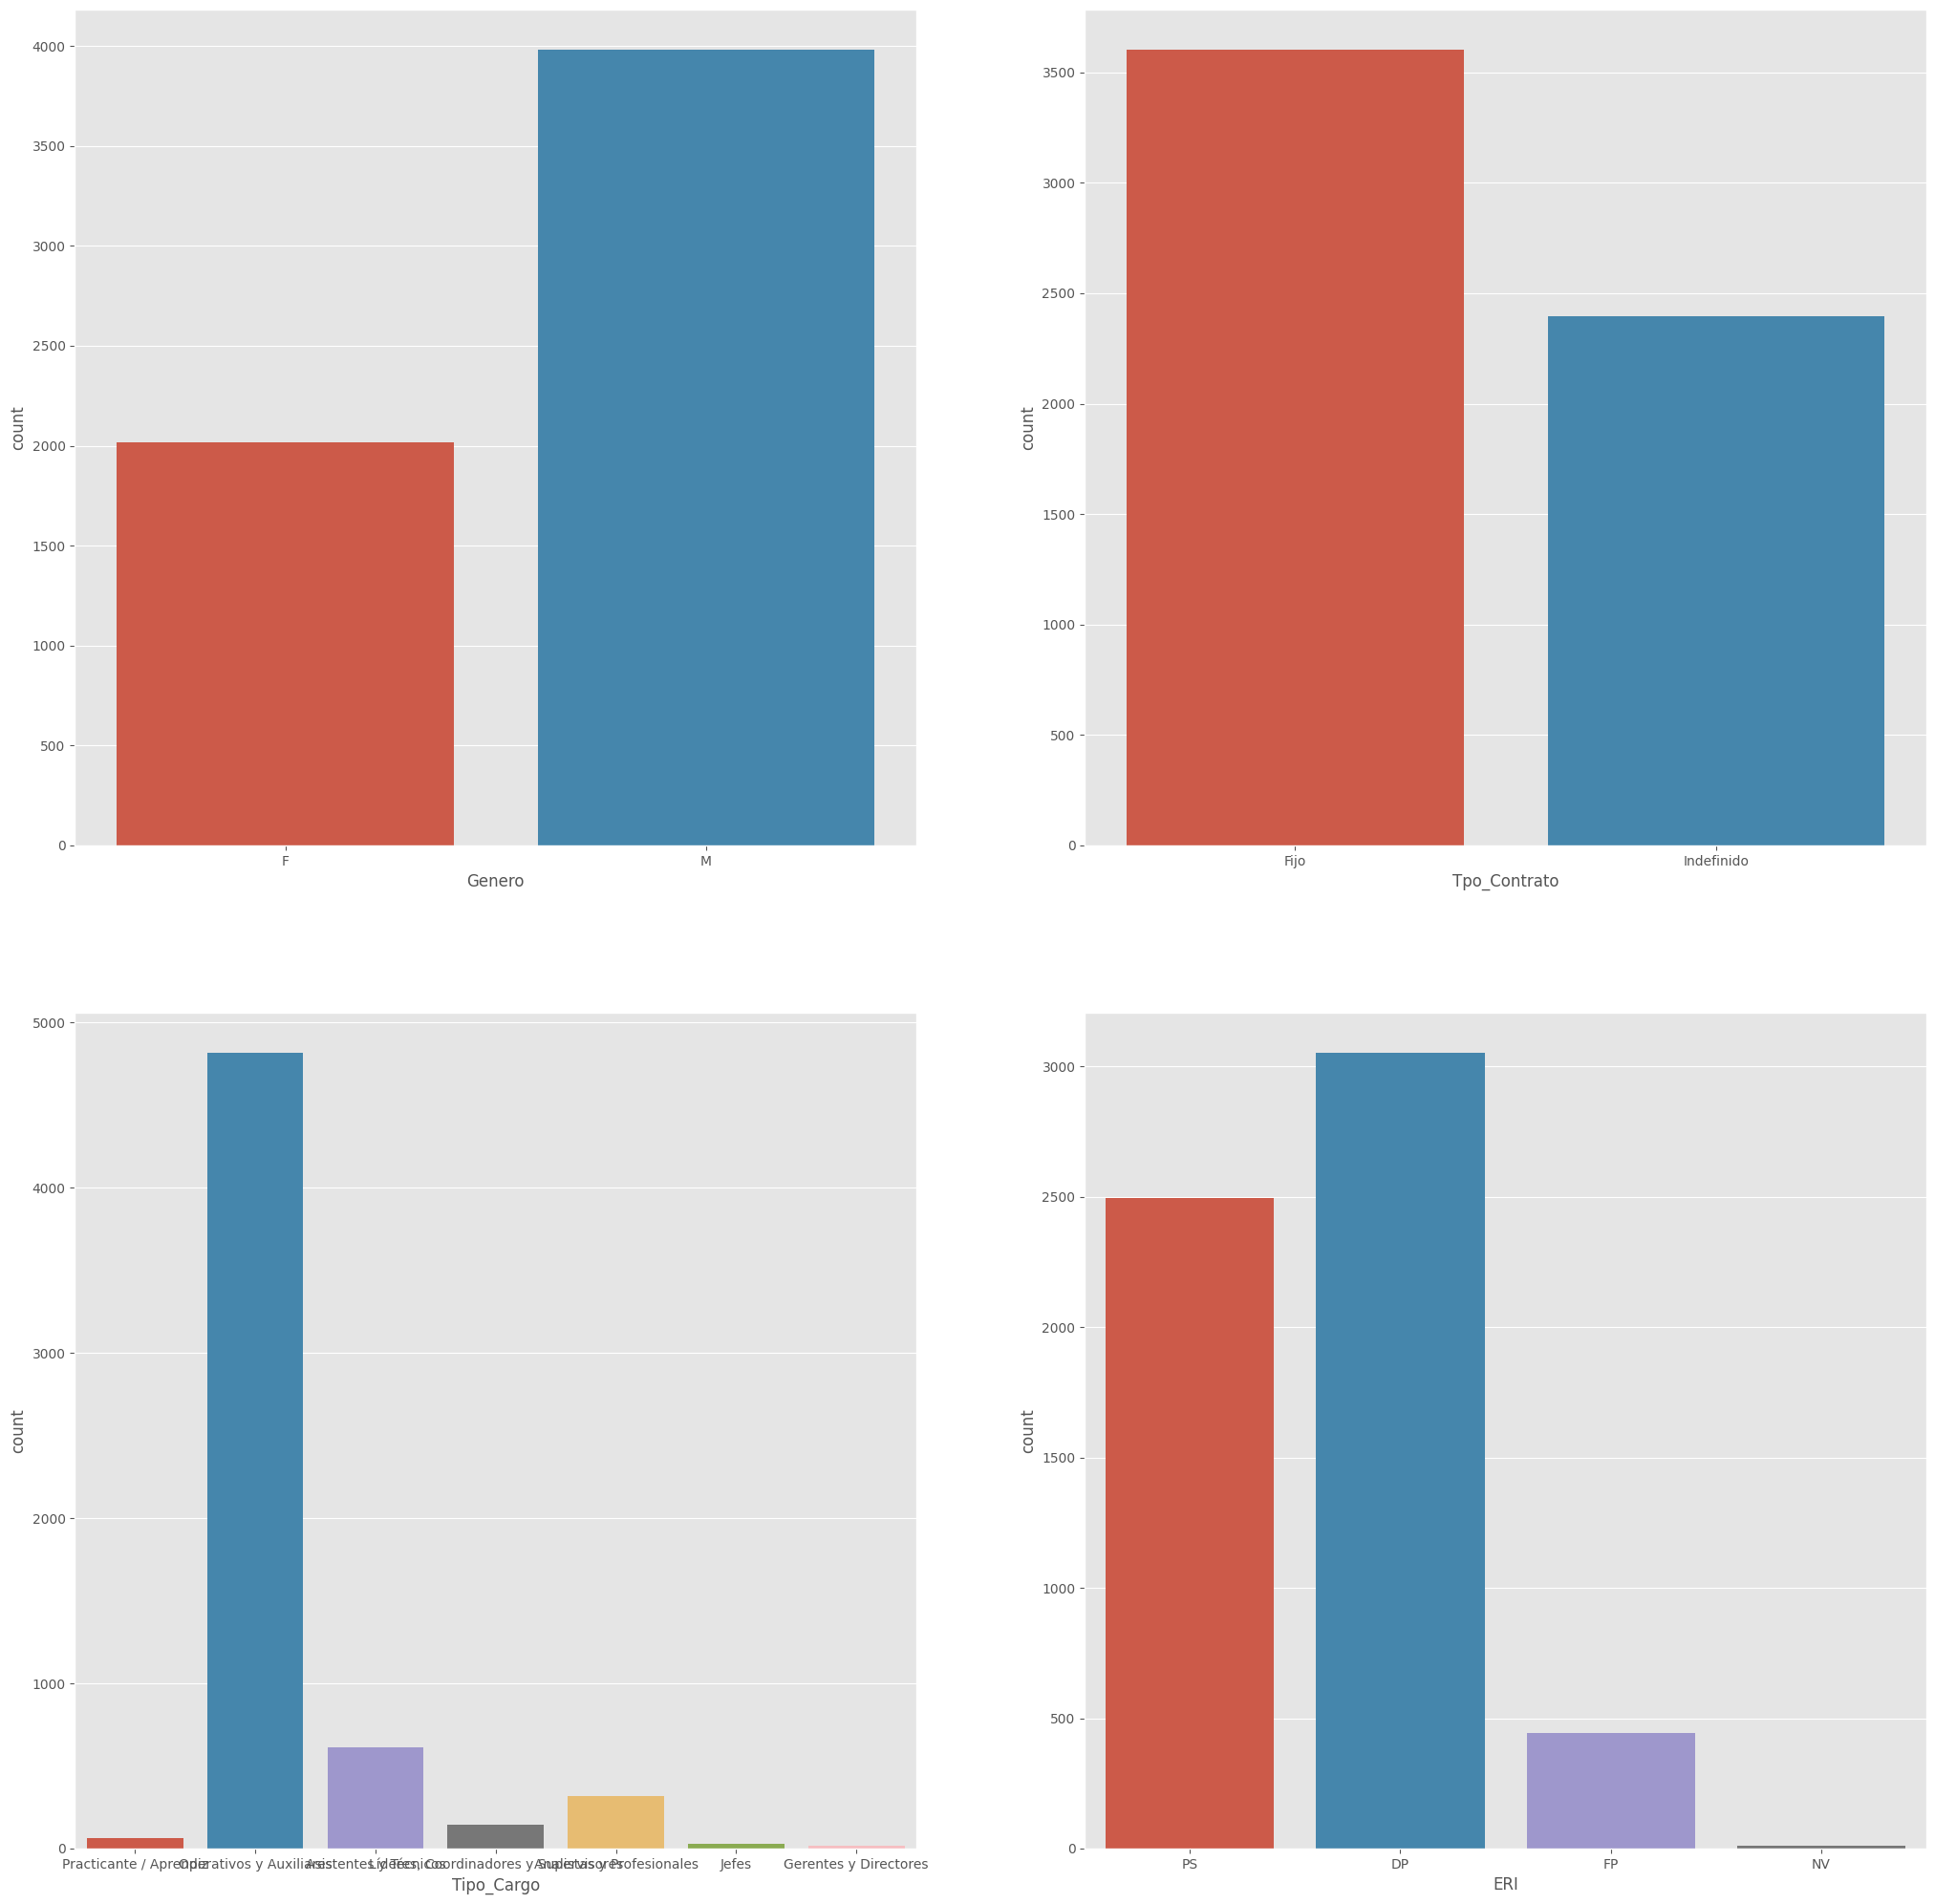

In [17]:
#Graficamos las variables categoricas
plot_multiples_graficas(dfActivos,CatColsAct,2,2,'c',None,(25,25))

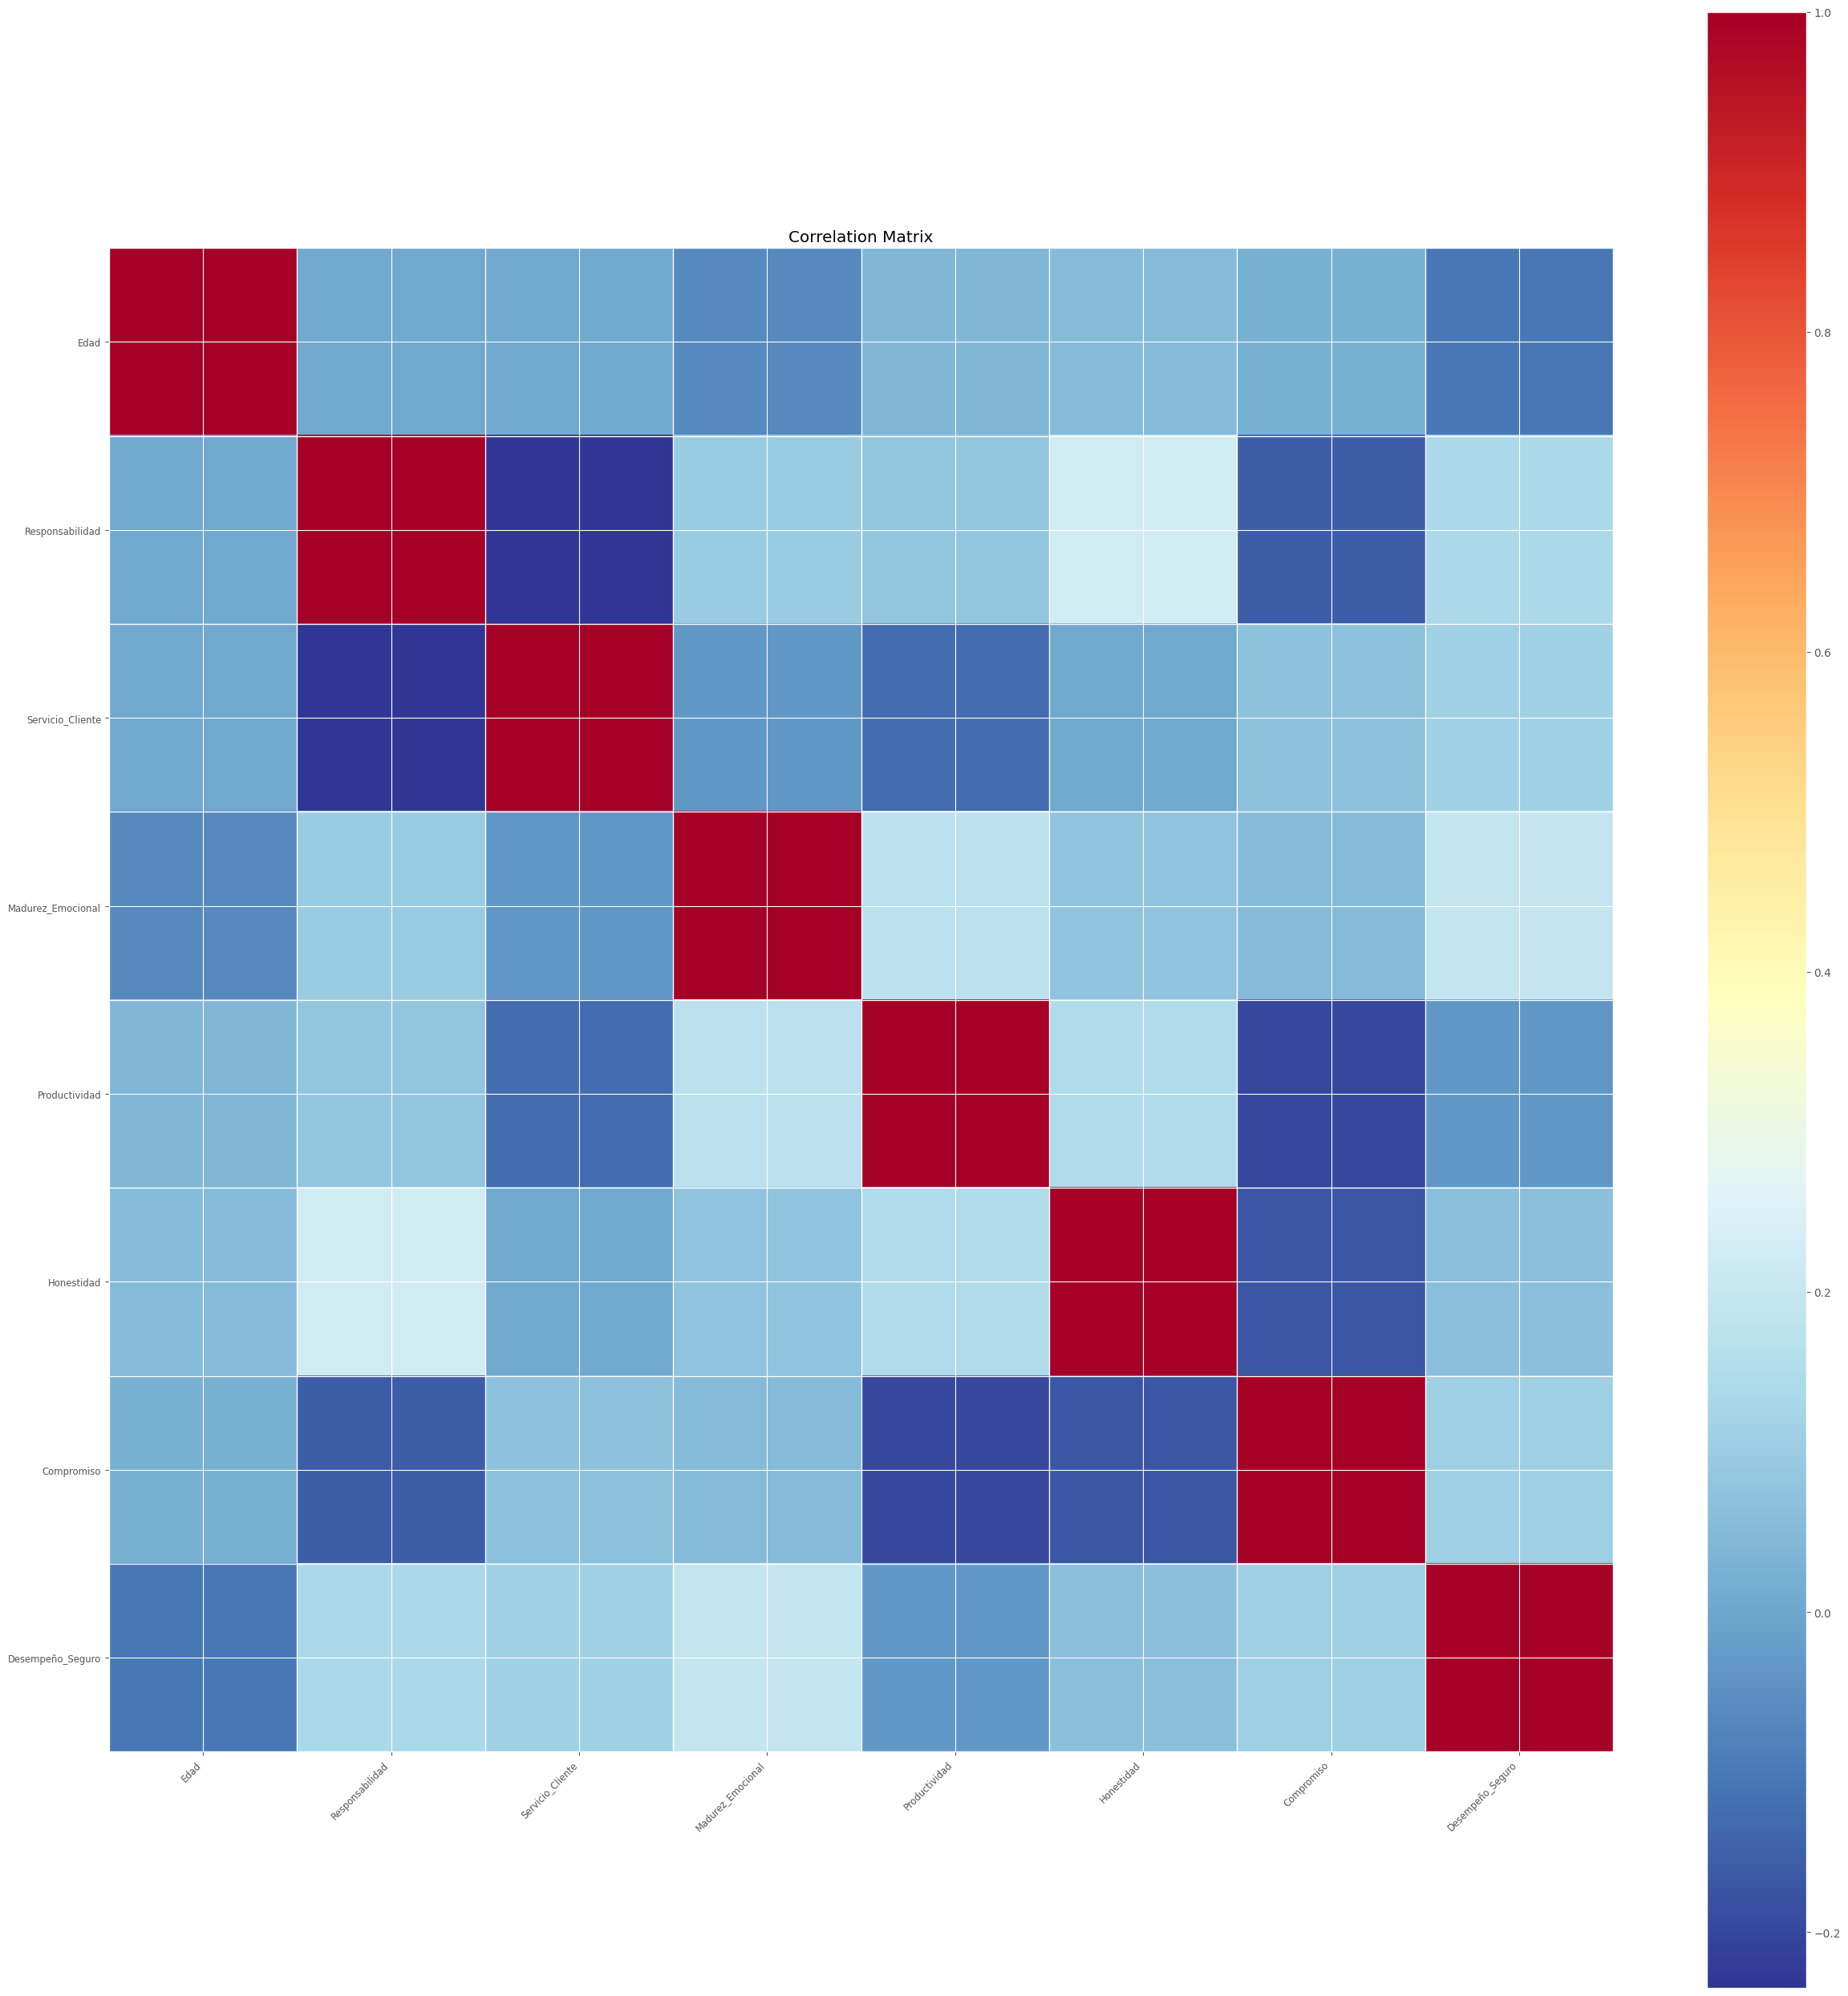

In [18]:
#Generamos Matrix de Correlacion para Df Activos
corractivos = dfActivos.set_index('Dias_Permanencia').corr()
sm.graphics.plot_corr(corractivos, xnames=list(corractivos.columns))
plt.show()

In [19]:
#Eliminar las columnas Fecha_Ingreso y Fecha_Retiro
dfActivos = dfActivos.drop(["Fecha_Ingreso", "Fecha_Retiro"], axis=1)
dfActivos.head()

Edad Genero Tpo_Contrato  Dias_Permanencia               Tipo_Cargo  \
5228    19      F         Fijo               356   Practicante / Aprendiz   
5229    20      M   Indefinido               280  Operativos y Auxiliares   
5230    20      F   Indefinido               232  Operativos y Auxiliares   
5231    20      F   Indefinido               265  Operativos y Auxiliares   
5232    20      F   Indefinido               553  Operativos y Auxiliares   

      Responsabilidad  Servicio_Cliente  Madurez_Emocional  Productividad  \
5228               15                43                 28              9   
5229               26                39                 22             22   
5230               24                16                 14             11   
5231               23                24                 33             13   
5232               25                 9                 19              7   

      Honestidad  Compromiso  Desempeño_Seguro ERI  
5228          16           9                 5  PS  
5229          14          13                38  PS  
5230          10           7                30  DP  
5231          15           9                17  PS  
5232          15          13                18  DP

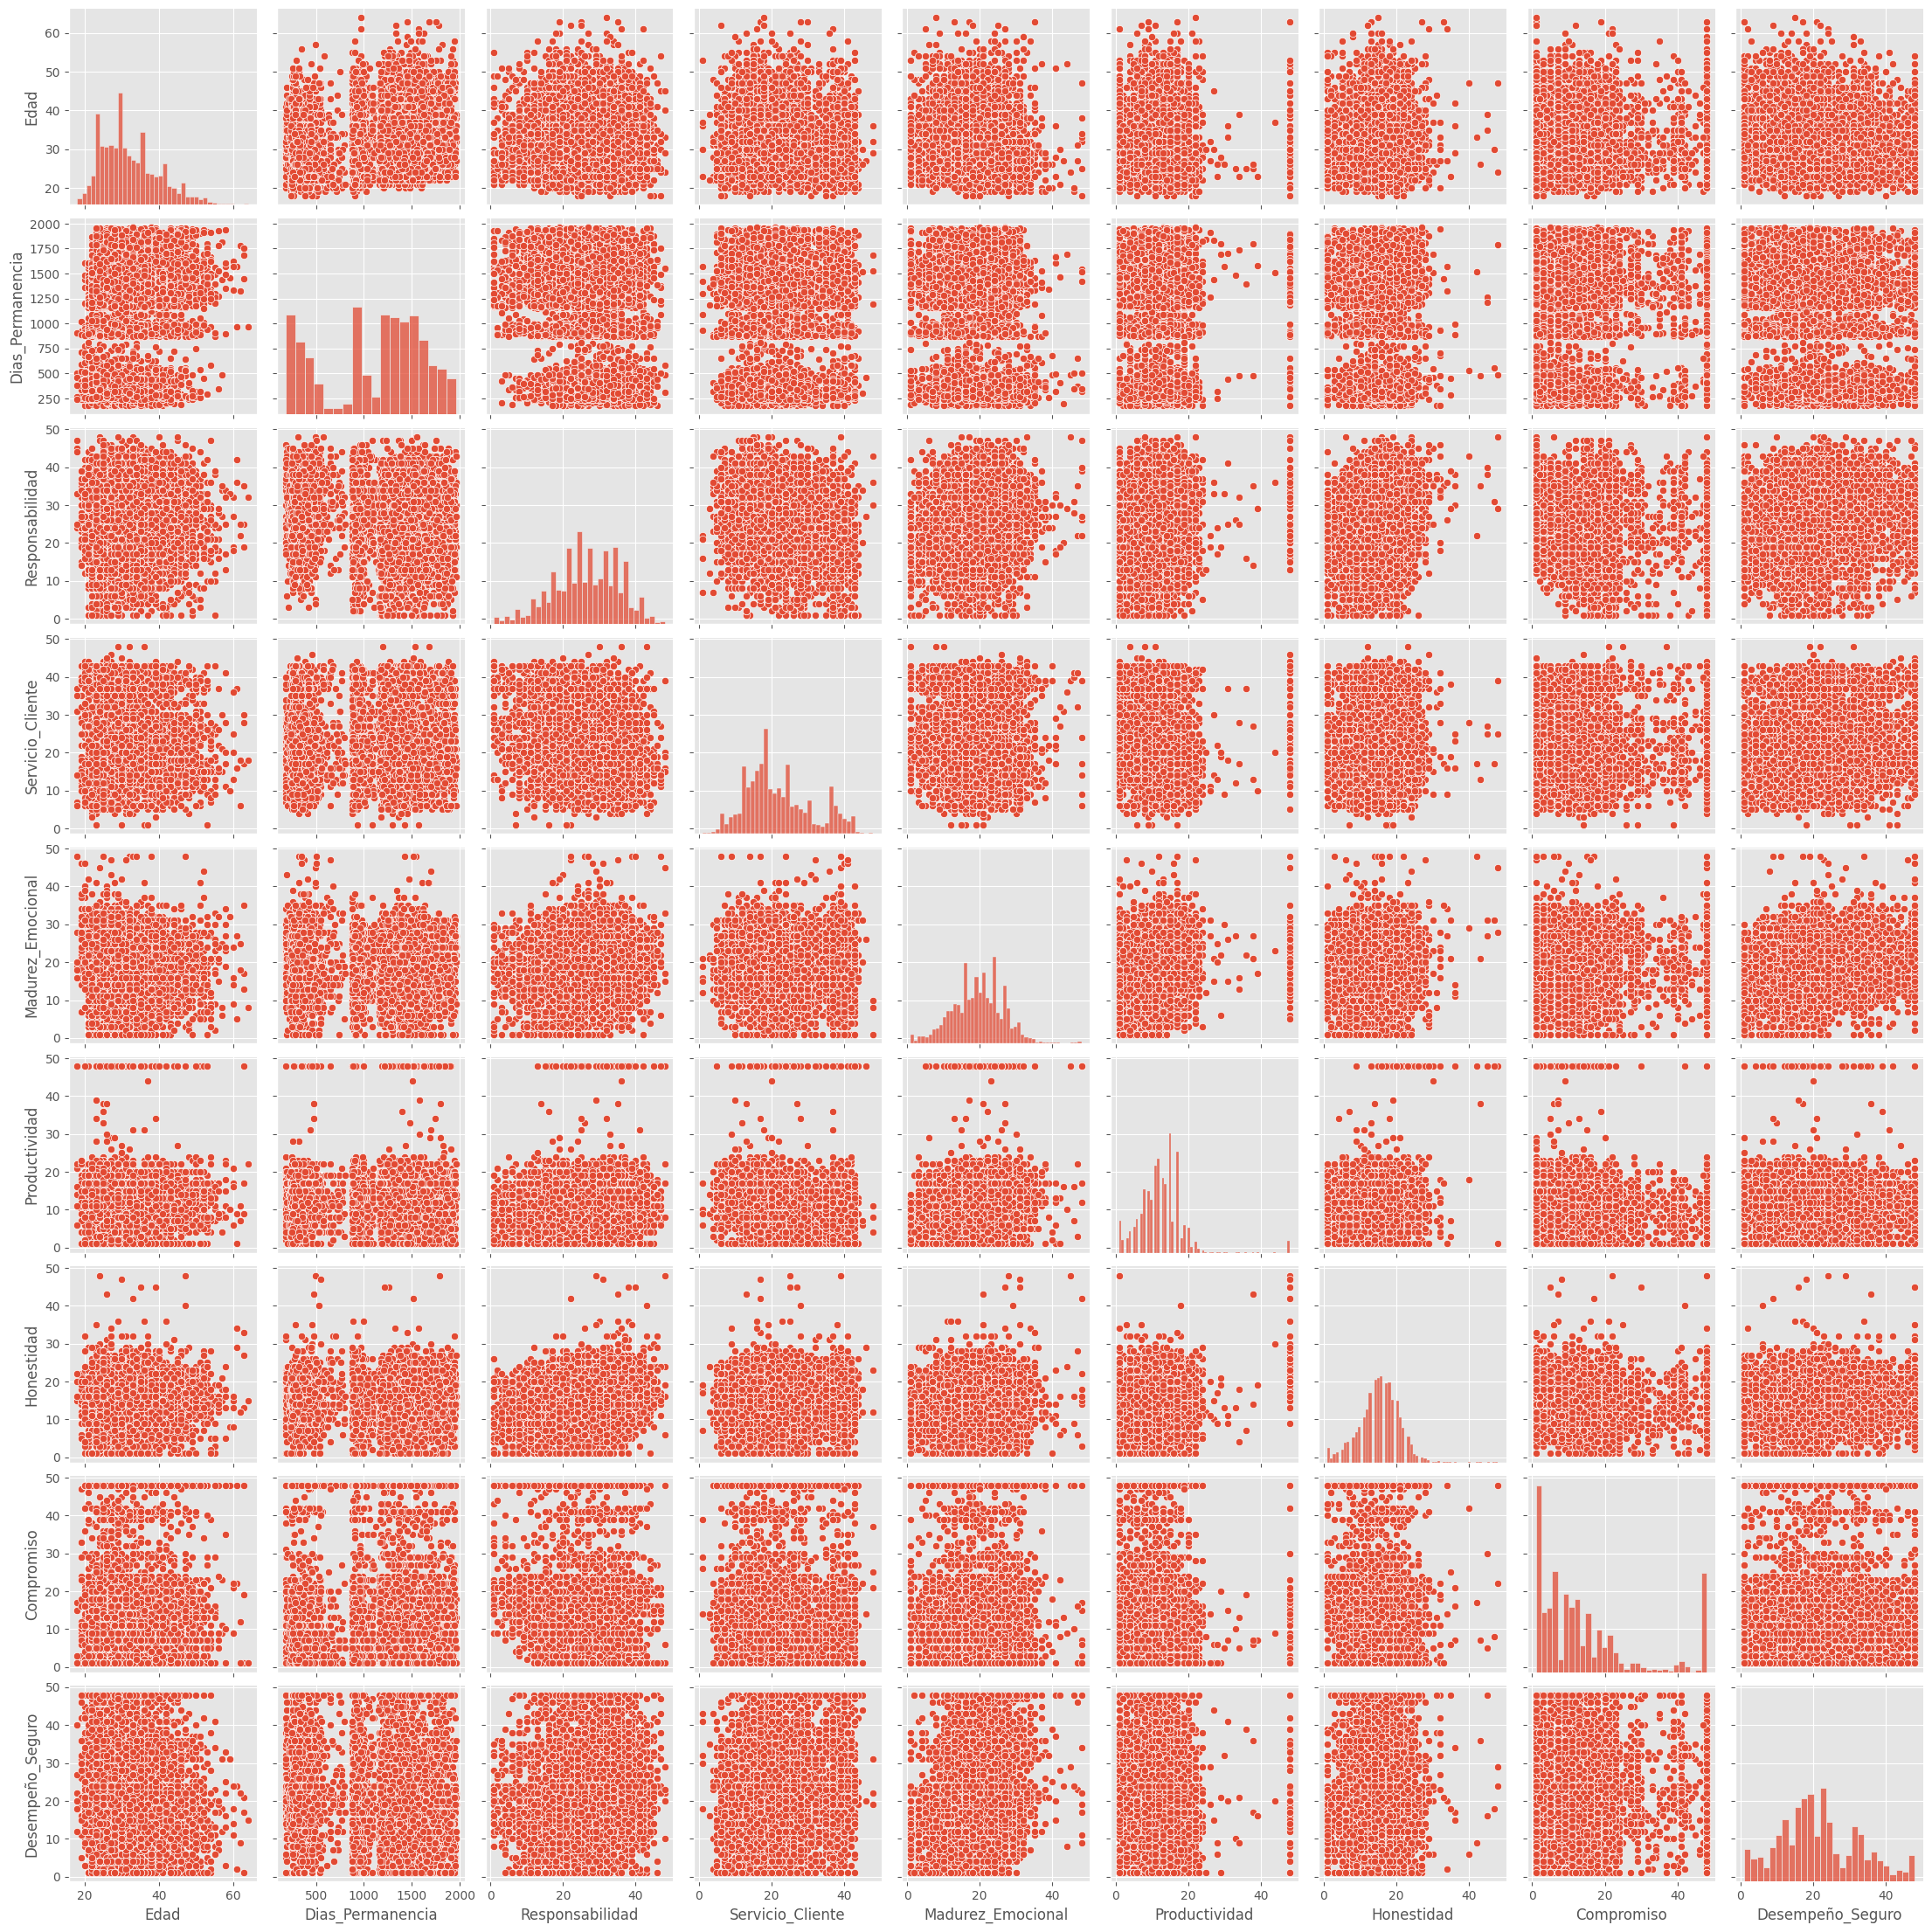

In [20]:
#graficamos las variables Numericas
sns.pairplot(dfActivos[NumColsAct])

In [21]:
#Creacion de variables dummies por cada una de las columnas categiricas
def create_dummy_variables(dfActivos, columns):
    data_pre = dfActivos.copy()
    for col in columns:
        dummies = pd.get_dummies(data_pre[col], prefix=col)
        data_pre = pd.concat([data_pre, dummies], axis=1)
        data_pre.drop(col, axis=1, inplace=True)
    return data_pre

In [22]:
CatColsAct = dfActivos.select_dtypes(include=["object"]).columns.tolist()
dfActivos[CatColsAct].columns
data_pre = create_dummy_variables(dfActivos, CatColsAct)
data_pre.head()

Edad  Dias_Permanencia  Responsabilidad  Servicio_Cliente  \
5228    19               356               15                43   
5229    20               280               26                39   
5230    20               232               24                16   
5231    20               265               23                24   
5232    20               553               25                 9   

      Madurez_Emocional  Productividad  Honestidad  Compromiso  \
5228                 28              9          16           9   
5229                 22             22          14          13   
5230                 14             11          10           7   
5231                 33             13          15           9   
5232                 19              7          15          13   

      Desempeño_Seguro  Genero_F  ...  Tipo_Cargo_Asistentes y Técnicos  \
5228                 5         1  ...                                 0   
5229                38         0  ...                                 0   
5230                30         1  ...                                 0   
5231                17         1  ...                                 0   
5232                18         1  ...                                 0   

      Tipo_Cargo_Gerentes y Directores  Tipo_Cargo_Jefes  \
5228                                 0                 0   
5229                                 0                 0   
5230                                 0                 0   
5231                                 0                 0   
5232                                 0                 0   

      Tipo_Cargo_Líderes, Coordinadores y Supervisores  \
5228                                                 0   
5229                                                 0   
5230                                                 0   
5231                                                 0   
5232                                                 0   

      Tipo_Cargo_Operativos y Auxiliares  Tipo_Cargo_Practicante / Aprendiz  \
5228                                   0                                  1   
5229                                   1                                  0   
5230                                   1                                  0   
5231                                   1                                  0   
5232                                   1                                  0   

      ERI_DP  ERI_FP  ERI_NV  ERI_PS  
5228       0       0       0       1  
5229       0       0       0       1  
5230       1       0       0       0  
5231       0       0       0       1  
5232       1       0       0       0  

[5 rows x 24 columns]

In [23]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6001 entries, 5228 to 11228
Data columns (total 24 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Edad                                              6001 non-null   int64
 1   Dias_Permanencia                                  6001 non-null   int64
 2   Responsabilidad                                   6001 non-null   int64
 3   Servicio_Cliente                                  6001 non-null   int64
 4   Madurez_Emocional                                 6001 non-null   int64
 5   Productividad                                     6001 non-null   int64
 6   Honestidad                                        6001 non-null   int64
 7   Compromiso                                        6001 non-null   int64
 8   Desempeño_Seguro                                  6001 non-null   int64
 9   Genero_F                             

## Normalización de los datos para el Df data_prer

In [24]:
#Reset al index ya que me puso valores diferentes
data_normAct = (data_pre-data_pre.min())/(data_pre.max()-data_pre.min())
data_normAct = data_normAct.reset_index(drop=True)
data_normAct.head()

Edad  Dias_Permanencia  Responsabilidad  Servicio_Cliente  \
0  0.021739          0.097136         0.297872          0.893617   
1  0.043478          0.054464         0.531915          0.808511   
2  0.043478          0.027513         0.489362          0.319149   
3  0.043478          0.046042         0.468085          0.489362   
4  0.043478          0.207748         0.510638          0.170213   

   Madurez_Emocional  Productividad  Honestidad  Compromiso  Desempeño_Seguro  \
0           0.574468       0.170213    0.319149    0.170213          0.085106   
1           0.446809       0.446809    0.276596    0.255319          0.787234   
2           0.276596       0.212766    0.191489    0.127660          0.617021   
3           0.680851       0.255319    0.297872    0.170213          0.340426   
4           0.382979       0.127660    0.297872    0.255319          0.361702   

   Genero_F  ...  Tipo_Cargo_Asistentes y Técnicos  \
0       1.0  ...                               0.0   
1       0.0  ...                               0.0   
2       1.0  ...                               0.0   
3       1.0  ...                               0.0   
4       1.0  ...                               0.0   

   Tipo_Cargo_Gerentes y Directores  Tipo_Cargo_Jefes  \
0                               0.0               0.0   
1                               0.0               0.0   
2                               0.0               0.0   
3                               0.0               0.0   
4                               0.0               0.0   

   Tipo_Cargo_Líderes, Coordinadores y Supervisores  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   Tipo_Cargo_Operativos y Auxiliares  Tipo_Cargo_Practicante / Aprendiz  \
0                                 0.0                                1.0   
1                                 1.0                                0.0   
2                                 1.0                                0.0   
3                                 1.0                                0.0   
4                                 1.0                                0.0   

   ERI_DP  ERI_FP  ERI_NV  ERI_PS  
0     0.0     0.0     0.0     1.0  
1     0.0     0.0     0.0     1.0  
2     1.0     0.0     0.0     0.0  
3     0.0     0.0     0.0     1.0  
4     1.0     0.0     0.0     0.0  

[5 rows x 24 columns]

In [25]:
#validamos que el valor minimo sea 0 y el maximo 1 asi ya esta todo el df Normalizado
data_normAct.describe()

Edad  Dias_Permanencia  Responsabilidad  Servicio_Cliente  \
count  6001.000000       6001.000000      6001.000000       6001.000000   
mean      0.307931          0.519863         0.536279          0.446961   
std       0.166612          0.290283         0.192022          0.192825   
min       0.000000          0.000000         0.000000          0.000000   
25%       0.173913          0.222908         0.404255          0.319149   
50%       0.282609          0.600786         0.531915          0.404255   
75%       0.413043          0.747333         0.680851          0.553191   
max       1.000000          1.000000         1.000000          1.000000   

       Madurez_Emocional  Productividad   Honestidad   Compromiso  \
count        6001.000000    6001.000000  6001.000000  6001.000000   
mean            0.391314       0.242339     0.303932     0.290012   
std             0.149670       0.131440     0.115540     0.296659   
min             0.000000       0.000000     0.000000     0.000000   
25%             0.297872       0.170213     0.234043     0.085106   
50%             0.404255       0.234043     0.319149     0.212766   
75%             0.489362       0.297872     0.382979     0.382979   
max             1.000000       1.000000     1.000000     1.000000   

       Desempeño_Seguro     Genero_F  ...  Tipo_Cargo_Asistentes y Técnicos  \
count       6001.000000  6001.000000  ...                       6001.000000   
mean           0.439547     0.336277  ...                          0.102483   
std            0.233464     0.472474  ...                          0.303308   
min            0.000000     0.000000  ...                          0.000000   
25%            0.276596     0.000000  ...                          0.000000   
50%            0.404255     0.000000  ...                          0.000000   
75%            0.617021     1.000000  ...                          0.000000   
max            1.000000     1.000000  ...                          1.000000   

       Tipo_Cargo_Gerentes y Directores  Tipo_Cargo_Jefes  \
count                       6001.000000       6001.000000   
mean                           0.002500          0.004333   
std                            0.049937          0.065685   
min                            0.000000          0.000000   
25%                            0.000000          0.000000   
50%                            0.000000          0.000000   
75%                            0.000000          0.000000   
max                            1.000000          1.000000   

       Tipo_Cargo_Líderes, Coordinadores y Supervisores  \
count                                       6001.000000   
mean                                           0.023996   
std                                            0.153049   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            0.000000   
max                                            1.000000   

       Tipo_Cargo_Operativos y Auxiliares  Tipo_Cargo_Practicante / Aprendiz  \
count                         6001.000000                        6001.000000   
mean                             0.802866                           0.010832   
std                              0.397867                           0.103518   
min                              0.000000                           0.000000   
25%                              1.000000                           0.000000   
50%                              1.000000                           0.000000   
75%                              1.000000                           0.000000   
max                              1.000000                           1.000000   

            ERI_DP       ERI_FP       ERI_NV       ERI_PS  
count  6001.000000  6001.000000  6001.000000  6001.000000  
mean      0.508915     0.073821     0.001666     0.415597  
std       0.499962   

## Hallar el número de clusters óptimo

Text(0, 0.5, 'wcss')

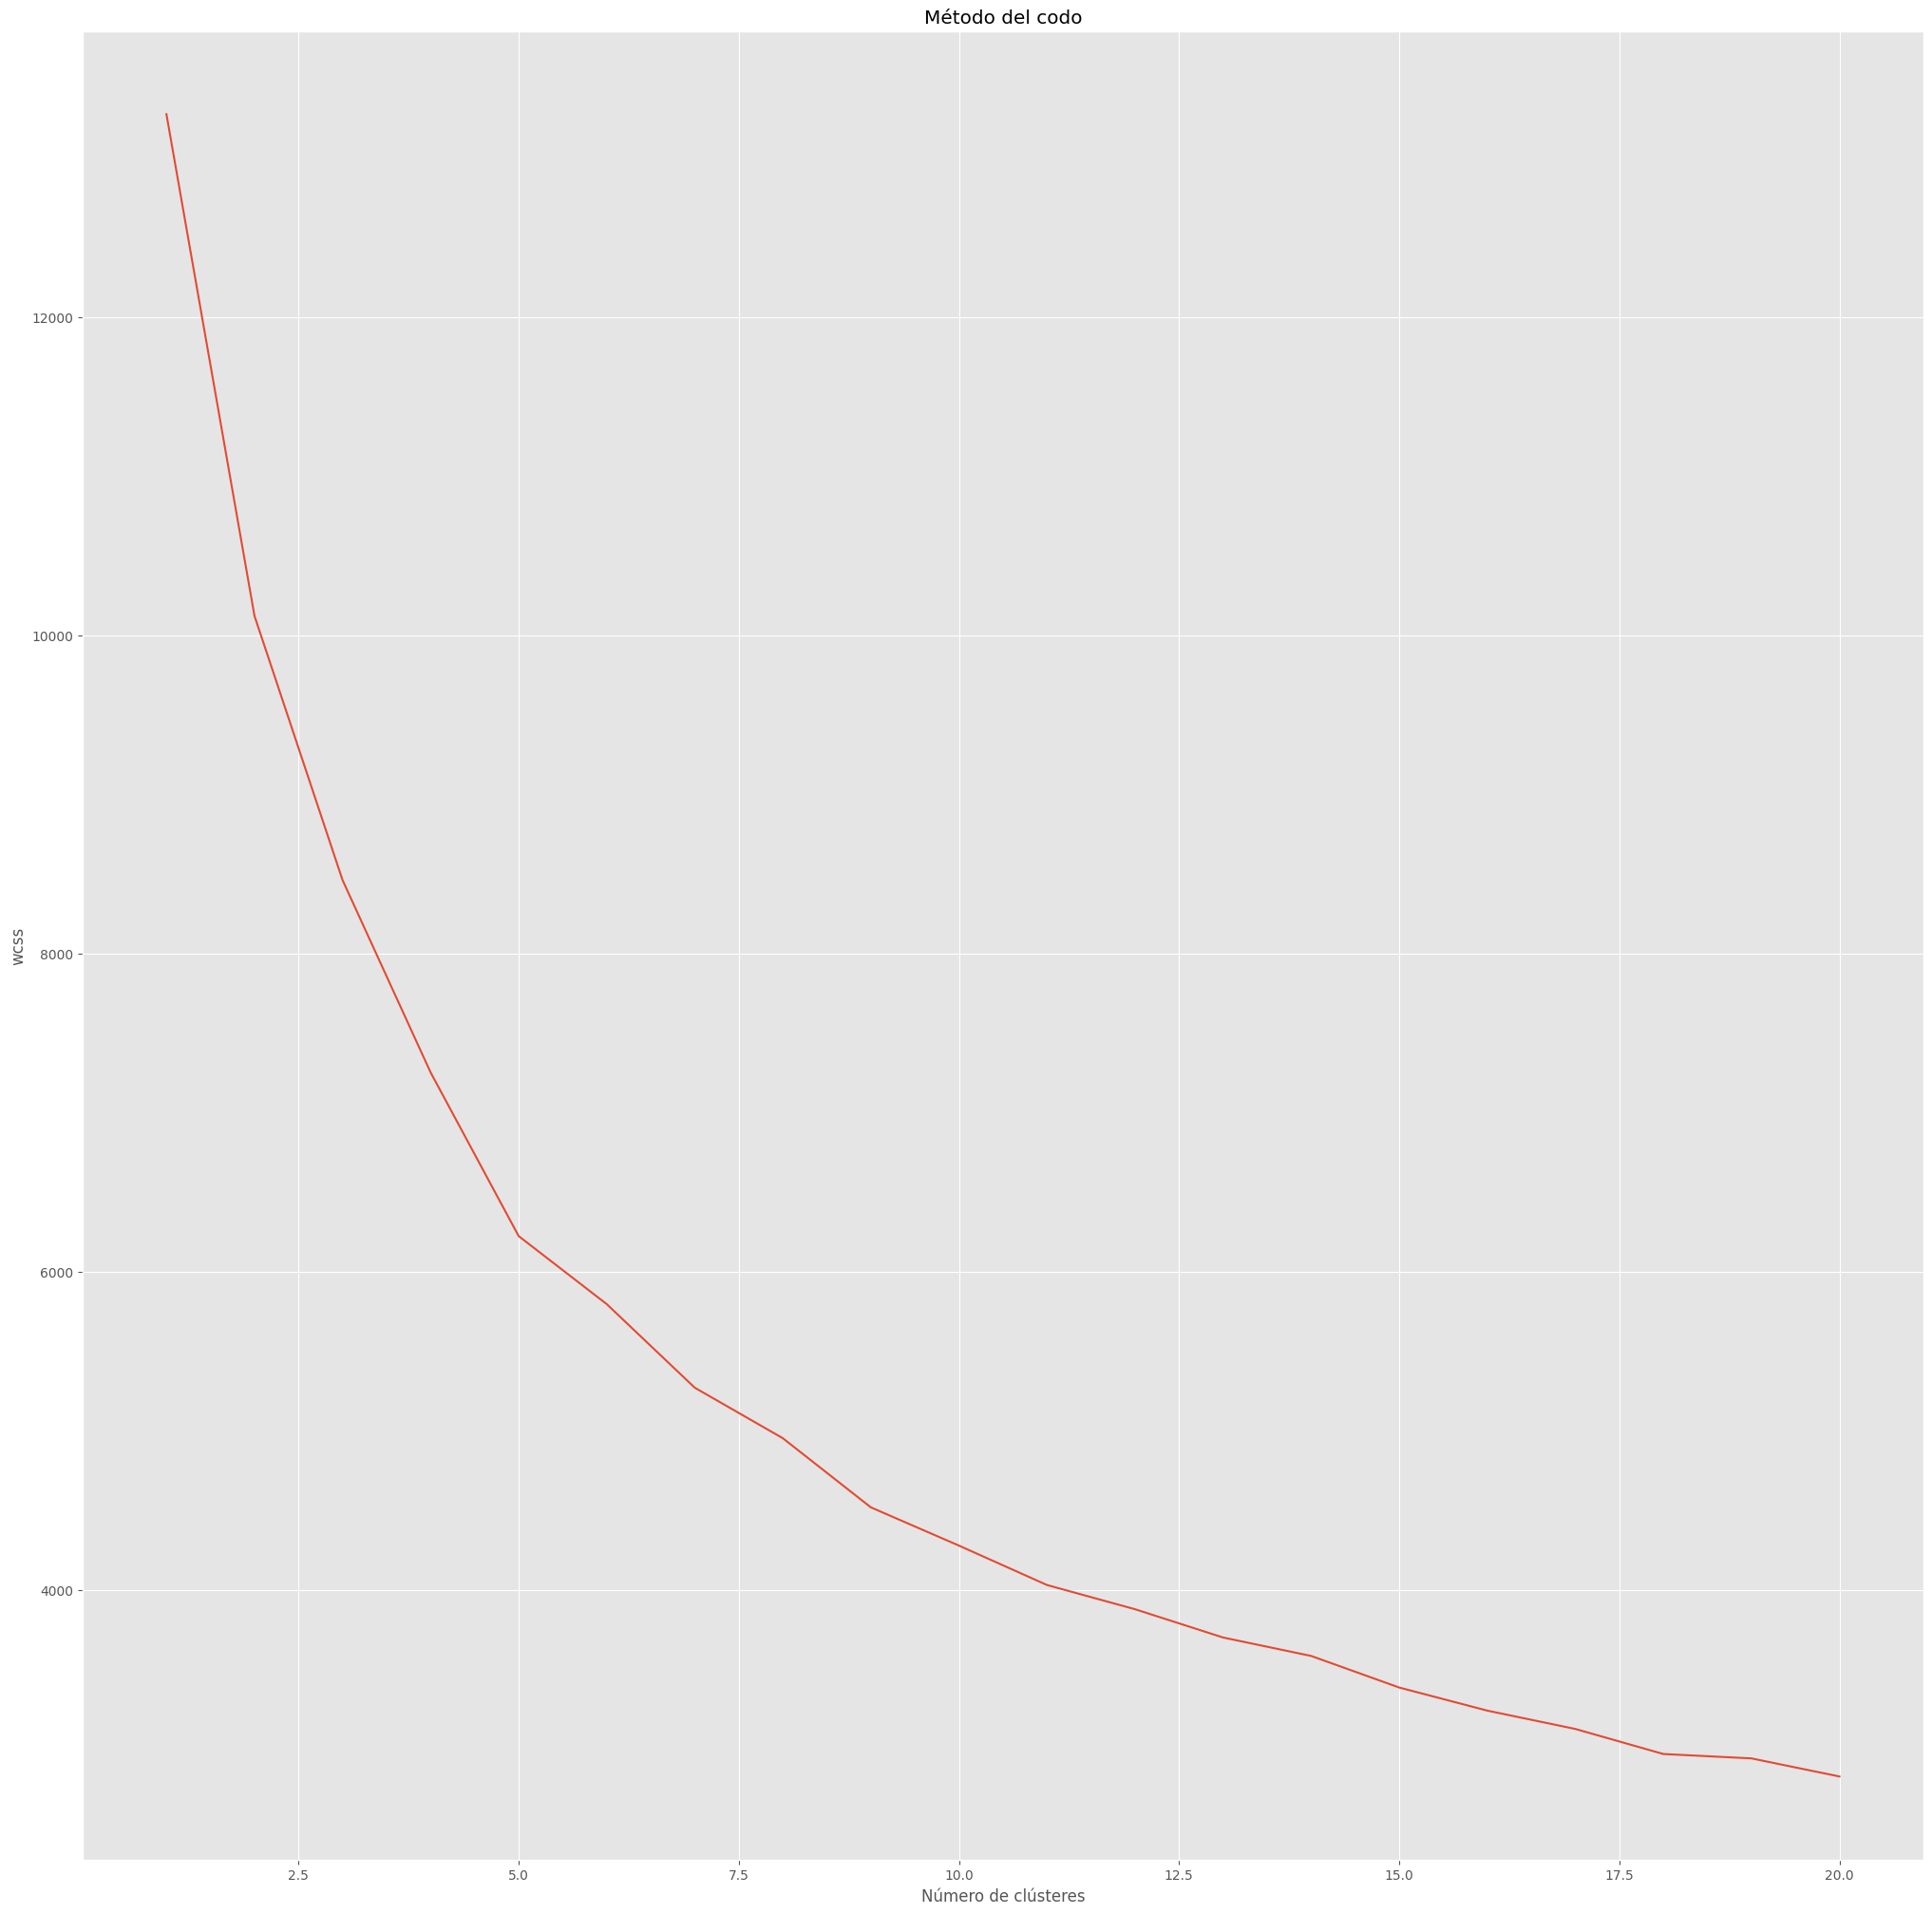

In [26]:
#from sklearn.cluster import KMeans
wcss=[]

for i in range(1,21):
  kmeans = KMeans(n_clusters=i,max_iter=300)
  kmeans.fit(data_normAct)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,21),wcss)
plt.title("Método del codo")
plt.xlabel("Número de clústeres")
plt.ylabel("wcss")

Text(0.5, 1.0, 'Indice de Silhouette')

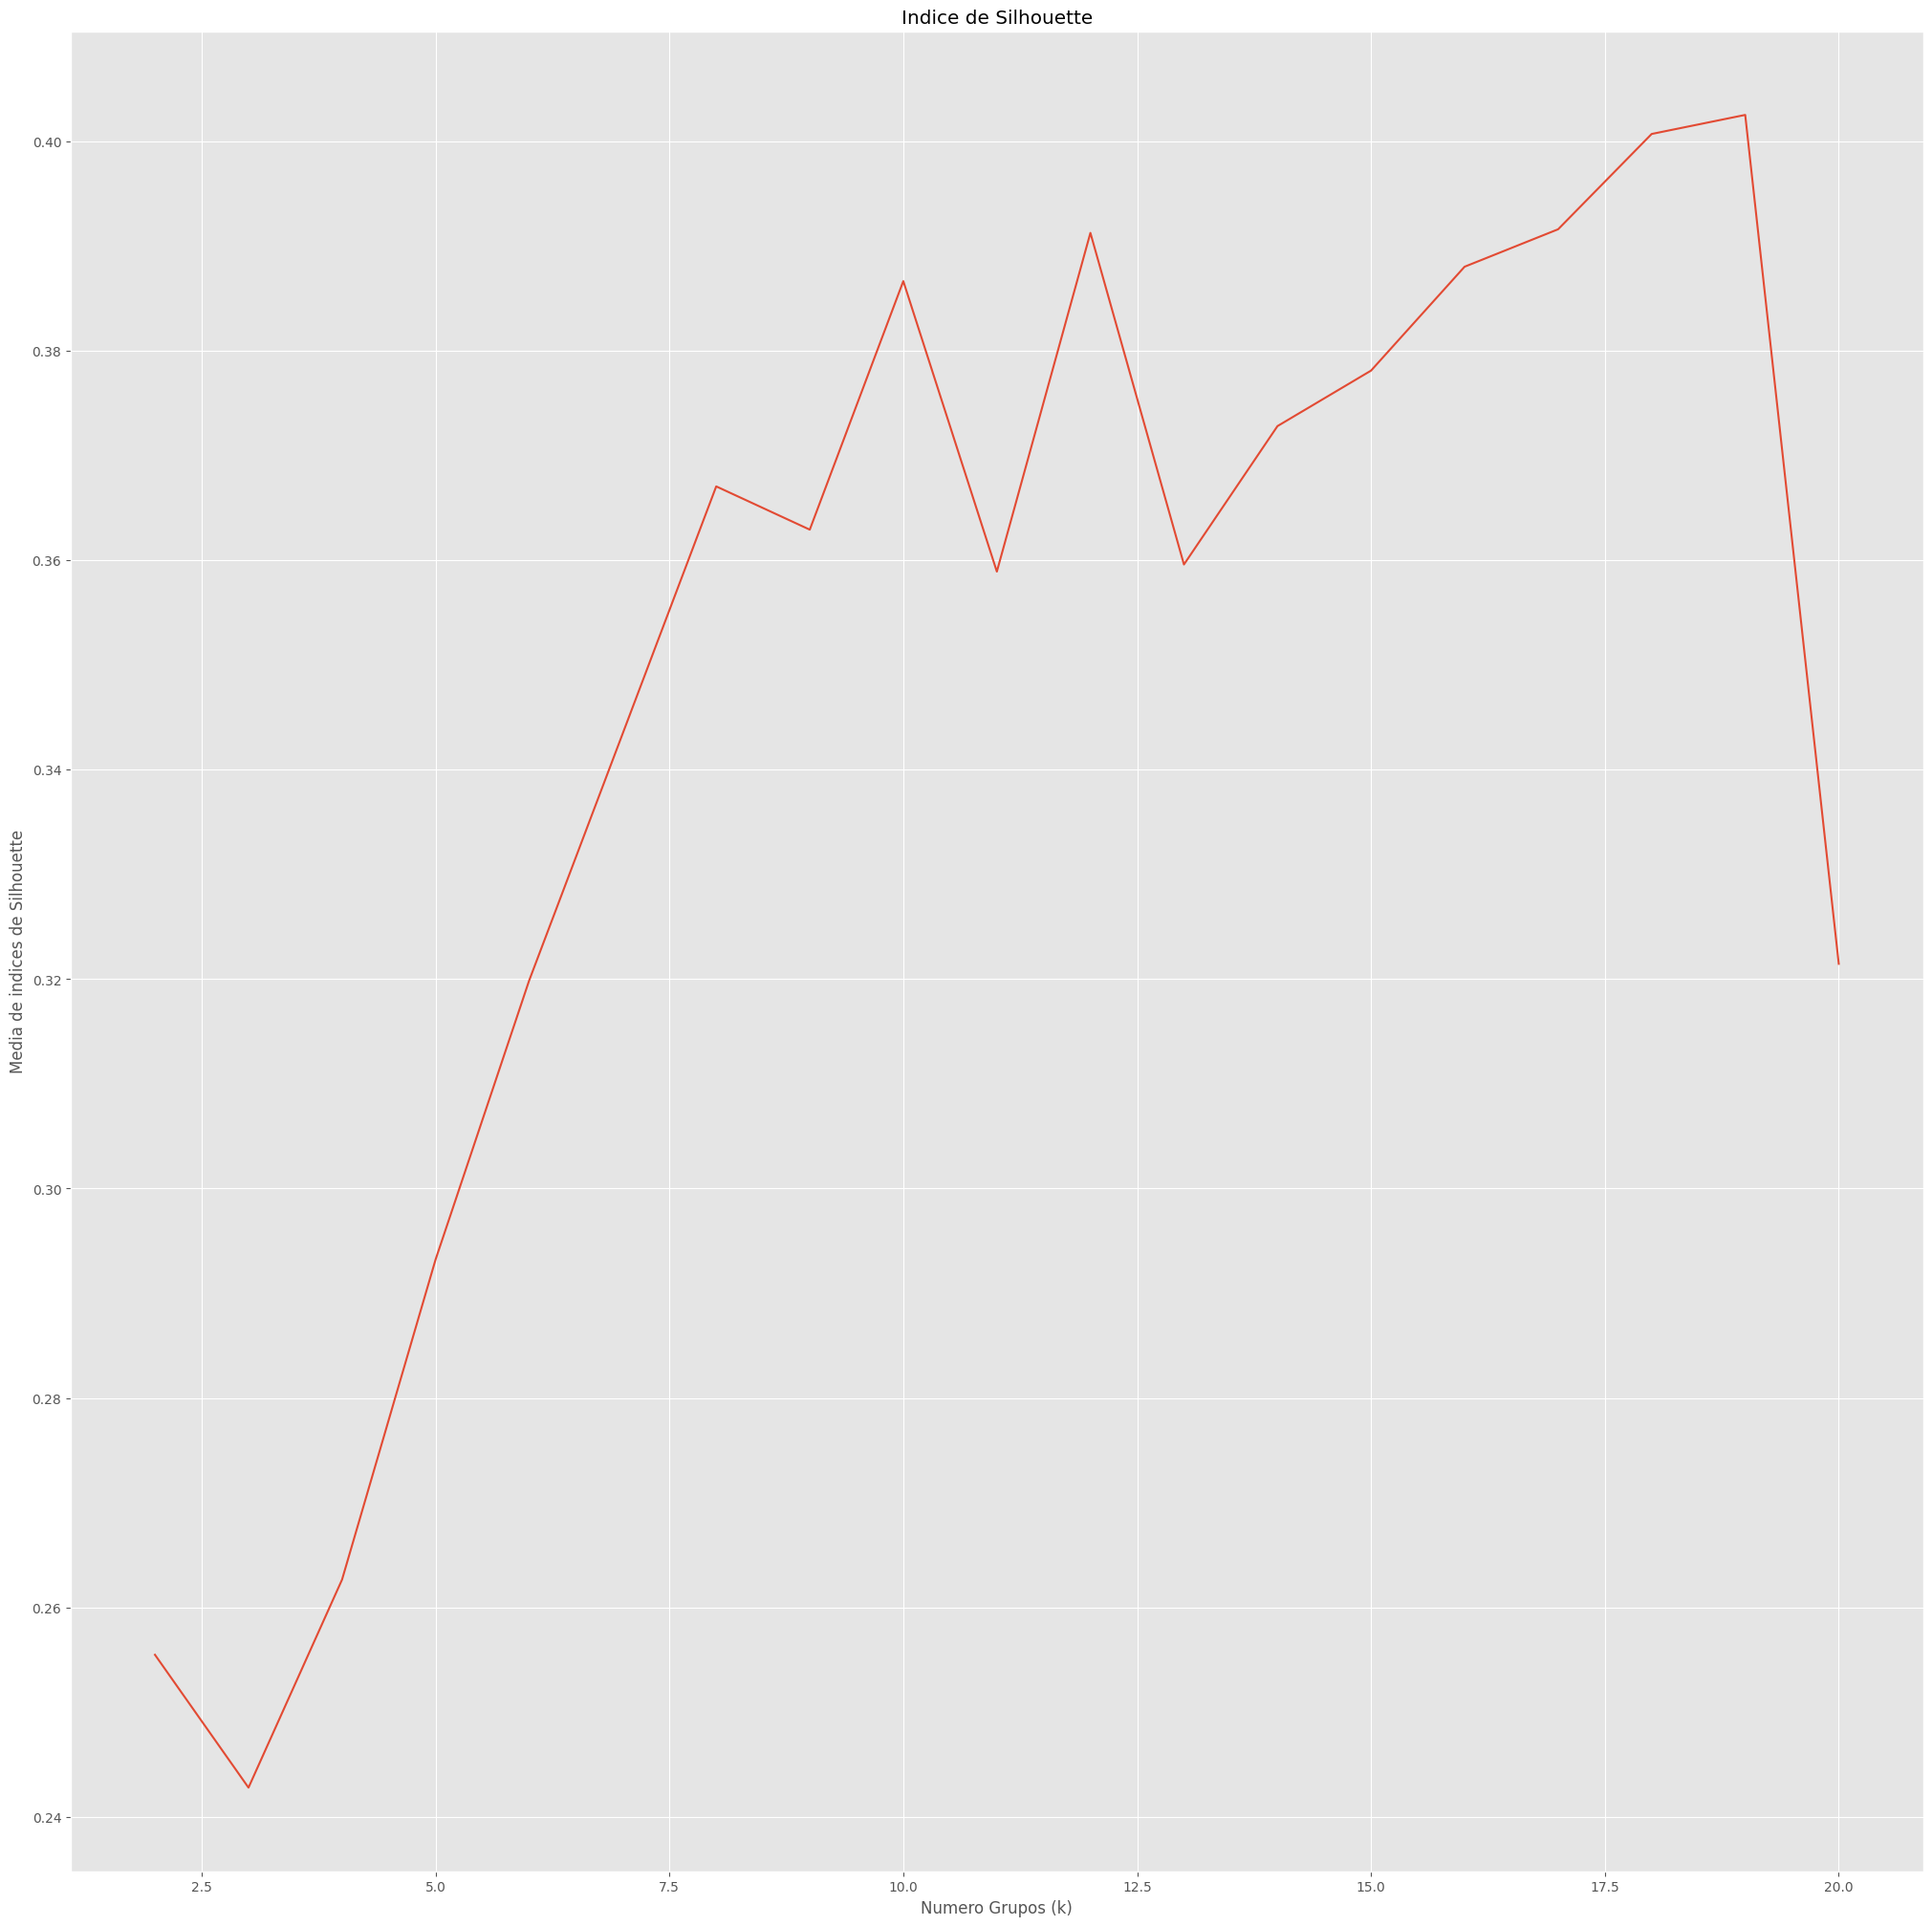

In [27]:
#Método de Silhouette
from sklearn.metrics import silhouette_score
numeroCluster = range(2,21)
valoresMedios = []

for n_clusters in numeroCluster:
  modeloKmeans = KMeans(n_clusters = n_clusters)
  labels = modeloKmeans.fit_predict(data_normAct)
  mediaSilhouette = silhouette_score(data_normAct, labels)
  valoresMedios.append(mediaSilhouette)

plt.plot(numeroCluster, valoresMedios)
plt.xlabel('Numero Grupos (k)')
plt.ylabel('Media de indices de Silhouette')
plt.title('Indice de Silhouette')

## Aplicar el clustering

In [28]:
#Aplicamos clusterin con 8 clusters que 
clustering = KMeans(n_clusters=5, max_iter=300)
clustering.fit(data_normAct)
clustering.cluster_centers_

array([[ 2.81648332e-01,  4.02508969e-01,  5.52465180e-01,
         4.03806716e-01,  3.55806204e-01,  2.37310946e-01,
         2.87063146e-01,  1.94736392e-01,  4.40015381e-01,
         1.00000000e+00,  1.55431223e-15,  4.79919679e-01,
         5.20080321e-01,  8.03212851e-02,  1.78714859e-01,
         4.01606426e-03,  4.01606426e-03,  1.70682731e-02,
         6.84738956e-01,  3.11244980e-02,  1.00000000e+00,
        -1.80411242e-16, -1.51788304e-18, -1.66533454e-16],
       [ 3.24186626e-01,  6.46394348e-01,  4.94556591e-01,
         4.87998846e-01,  4.45044814e-01,  2.51984159e-01,
         3.16904231e-01,  4.41308984e-01,  4.33115811e-01,
        -1.22124533e-15,  1.00000000e+00,  1.00000000e+00,
         1.83186799e-15,  1.50715901e-03,  4.82290882e-02,
         1.50715901e-03,  7.53579503e-04,  2.93896006e-02,
         9.17859834e-01,  7.53579503e-04, -4.44089210e-16,
         1.15297664e-01,  4.52147702e-03,  8.80180859e-01],
       [ 3.02383546e-01,  4.38023139e-01,  6.08151990e

## Agregar a la clasificación original

In [29]:
data_normAct['KMeans_Clusters'] = clustering.labels_
data_normAct

Edad  Dias_Permanencia  Responsabilidad  Servicio_Cliente  \
0     0.021739          0.097136         0.297872          0.893617   
1     0.043478          0.054464         0.531915          0.808511   
2     0.043478          0.027513         0.489362          0.319149   
3     0.043478          0.046042         0.468085          0.489362   
4     0.043478          0.207748         0.510638          0.170213   
...        ...               ...              ...               ...   
5996  0.086957          0.080853         0.446809          0.446809   
5997  0.130435          0.084784         0.255319          0.553191   
5998  0.108696          0.164514         0.659574          0.574468   
5999  0.108696          0.049972         0.170213          0.404255   
6000  0.543478          0.076923         0.787234          0.404255   

      Madurez_Emocional  Productividad  Honestidad  Compromiso  \
0              0.574468       0.170213    0.319149    0.170213   
1              0.446809       0.446809    0.276596    0.255319   
2              0.276596       0.212766    0.191489    0.127660   
3              0.680851       0.255319    0.297872    0.170213   
4              0.382979       0.127660    0.297872    0.255319   
...                 ...            ...         ...         ...   
5996           0.510638       0.276596    0.276596    0.170213   
5997           0.361702       0.042553    0.042553    0.425532   
5998           0.255319       0.702128    0.063830    0.255319   
5999           0.361702       0.212766    0.319149    0.297872   
6000           0.319149       0.297872    0.319149    0.021277   

      Desempeño_Seguro  Genero_F  ...  Tipo_Cargo_Gerentes y Directores  \
0             0.085106       1.0  ...                               0.0   
1             0.787234       0.0  ...                               0.0   
2             0.617021       1.0  ...                               0.0   
3             0.340426       1.0  ...                               0.0   
4             0.361702       1.0  ...                               0.0   
...                ...       ...  ...                               ...   
5996          0.808511       0.0  ...                               0.0   
5997          0.893617       1.0  ...                               0.0   
5998          0.425532       0.0  ...                               0.0   
5999          0.212766       1.0  ...                               0.0   
6000          0.425532       1.0  ...                               0.0   

      Tipo_Cargo_Jefes  Tipo_Cargo_Líderes, Coordinadores y Supervisores  \
0                  0.0                                               0.0   
1                  0.0                                               0.0   
2                  0.0                                               0.0   
3                  0.0                                               0.0   
4                  0.0                                               0.0   
...                ...                                               ...   
5996               0.0                                               0.0   
5997               0.0                                               0.0   
5998               0.0                                               0.0   
5999               0.0                                               0.0   
6000               0.0                                               0.0   

      Tipo_Cargo_Operativos y Auxiliares  Tipo_Cargo_Practicante / Aprendiz  \
0                                    0.0                                1.0   
1                                    1.0                                0.0   
2                                    1.0                                0.0   
3                                    1.0                                0.0   
4                                    1.0                                0.0   
...                                  ...                                ... 

In [30]:
data_normAct = data_normAct.dropna()
data_normAct.head()

Edad  Dias_Permanencia  Responsabilidad  Servicio_Cliente  \
0  0.021739          0.097136         0.297872          0.893617   
1  0.043478          0.054464         0.531915          0.808511   
2  0.043478          0.027513         0.489362          0.319149   
3  0.043478          0.046042         0.468085          0.489362   
4  0.043478          0.207748         0.510638          0.170213   

   Madurez_Emocional  Productividad  Honestidad  Compromiso  Desempeño_Seguro  \
0           0.574468       0.170213    0.319149    0.170213          0.085106   
1           0.446809       0.446809    0.276596    0.255319          0.787234   
2           0.276596       0.212766    0.191489    0.127660          0.617021   
3           0.680851       0.255319    0.297872    0.170213          0.340426   
4           0.382979       0.127660    0.297872    0.255319          0.361702   

   Genero_F  ...  Tipo_Cargo_Gerentes y Directores  Tipo_Cargo_Jefes  \
0       1.0  ...                               0.0               0.0   
1       0.0  ...                               0.0               0.0   
2       1.0  ...                               0.0               0.0   
3       1.0  ...                               0.0               0.0   
4       1.0  ...                               0.0               0.0   

   Tipo_Cargo_Líderes, Coordinadores y Supervisores  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   Tipo_Cargo_Operativos y Auxiliares  Tipo_Cargo_Practicante / Aprendiz  \
0                                 0.0                                1.0   
1                                 1.0                                0.0   
2                                 1.0                                0.0   
3                                 1.0                                0.0   
4                                 1.0                                0.0   

   ERI_DP  ERI_FP  ERI_NV  ERI_PS  KMeans_Clusters  
0     0.0     0.0     0.0     1.0                4  
1     0.0     0.0     0.0     1.0                2  
2     1.0     0.0     0.0     0.0                0  
3     0.0     0.0     0.0     1.0                4  
4     1.0     0.0     0.0     0.0                0  

[5 rows x 25 columns]

## Visualización

In [31]:
from sklearn.decomposition import PCA #PCA (Análisis de Componentes Principales)

pca = PCA(n_components=2)#Quiero un grafico de 2 dimenciones con el modelo pca
pca_data=pca.fit_transform(data_normAct)#Aplico fit del modelo pca
pca_data_df= pd.DataFrame(data=pca_data, columns=['Componente1', 'Componente2'])#Creo un df con los valores de las 2 componentes principales
pca_add = pd.concat([pca_data_df, data_normAct['KMeans_Clusters']], axis=1)#indico los 2 objetos a concatenar y axis=1 para indicar que son columnas
pca_add.head()

Componente1  Componente2  KMeans_Clusters
0     2.050333     0.255109                4
1     0.077465     0.319138                2
2    -2.055869     1.286977                0
3     2.067648     1.124689                4
4    -2.057581     1.235739                0

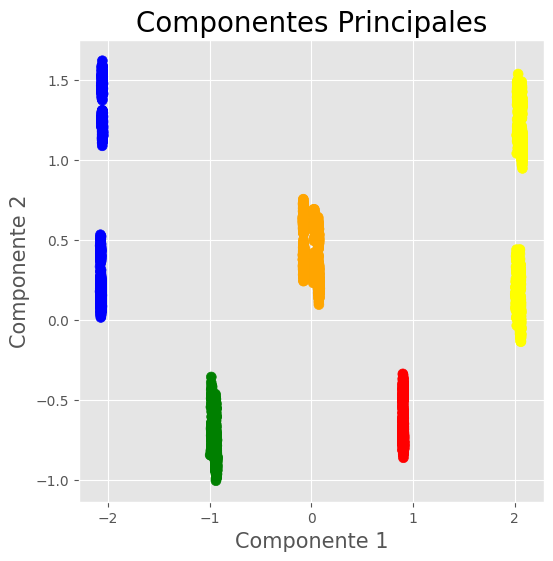

In [32]:
fig = plt.figure(figsize=(6,6))#Creamos figura de tamaño 6*6 y se guarda en fig

ax = fig.add_subplot(1,1,1)#creo solo 1 grafico dentro de la figura y lo guardo en ax
ax.set_xlabel('Componente 1', fontsize = 15)#Nombres de ejes 
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)#Nombre de grafico

color_theme = np.array(["blue","green", "orange","red","yellow"])#Creo un array para guardar los colores y lo guardo en color_theme
ax.scatter(x = pca_add.Componente1, y = pca_add.Componente2, #Dibujo los puntos que representan a los vino por scatter x = componente1 y y= componente 2
            c= color_theme[pca_add.KMeans_Clusters], s=50) #utilizo el parametro c para los colores de los puntos  s= tamaño de lso puntos a graficar
plt.show()

## Desnormalizaremos

In [33]:
desnorm_cluster=data_normAct*(data_pre.max()-data_pre.min()) + data_pre.min()
desnorm_cluster.head()

Compromiso  Desempeño_Seguro  Dias_Permanencia  ERI_DP  ERI_FP  ERI_NV  \
0         9.0               5.0             356.0     0.0     0.0     0.0   
1        13.0              38.0             280.0     0.0     0.0     0.0   
2         7.0              30.0             232.0     1.0     0.0     0.0   
3         9.0              17.0             265.0     0.0     0.0     0.0   
4        13.0              18.0             553.0     1.0     0.0     0.0   

   ERI_PS  Edad  Genero_F  Genero_M  ...  Servicio_Cliente  \
0     1.0  19.0       1.0       0.0  ...              43.0   
1     1.0  20.0       0.0       1.0  ...              39.0   
2     0.0  20.0       1.0       0.0  ...              16.0   
3     1.0  20.0       1.0       0.0  ...              24.0   
4     0.0  20.0       1.0       0.0  ...               9.0   

   Tipo_Cargo_Analistas y Profesionales  Tipo_Cargo_Asistentes y Técnicos  \
0                                   0.0                               0.0   
1                                   0.0                               0.0   
2                                   0.0                               0.0   
3                                   0.0                               0.0   
4                                   0.0                               0.0   

   Tipo_Cargo_Gerentes y Directores  Tipo_Cargo_Jefes  \
0                               0.0               0.0   
1                               0.0               0.0   
2                               0.0               0.0   
3                               0.0               0.0   
4                               0.0               0.0   

   Tipo_Cargo_Líderes, Coordinadores y Supervisores  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   Tipo_Cargo_Operativos y Auxiliares  Tipo_Cargo_Practicante / Aprendiz  \
0                                 0.0                                1.0   
1                                 1.0                                0.0   
2                                 1.0                                0.0   
3                                 1.0                                0.0   
4                                 1.0                                0.0   

   Tpo_Contrato_Fijo  Tpo_Contrato_Indefinido  
0                1.0                      0.0  
1                0.0                      1.0  
2                0.0                      1.0  
3                0.0                      1.0  
4                0.0                      1.0  

[5 rows x 25 columns]

# Visualizacion Dataframe Retirados
## Matriz de Correlación para Retirados

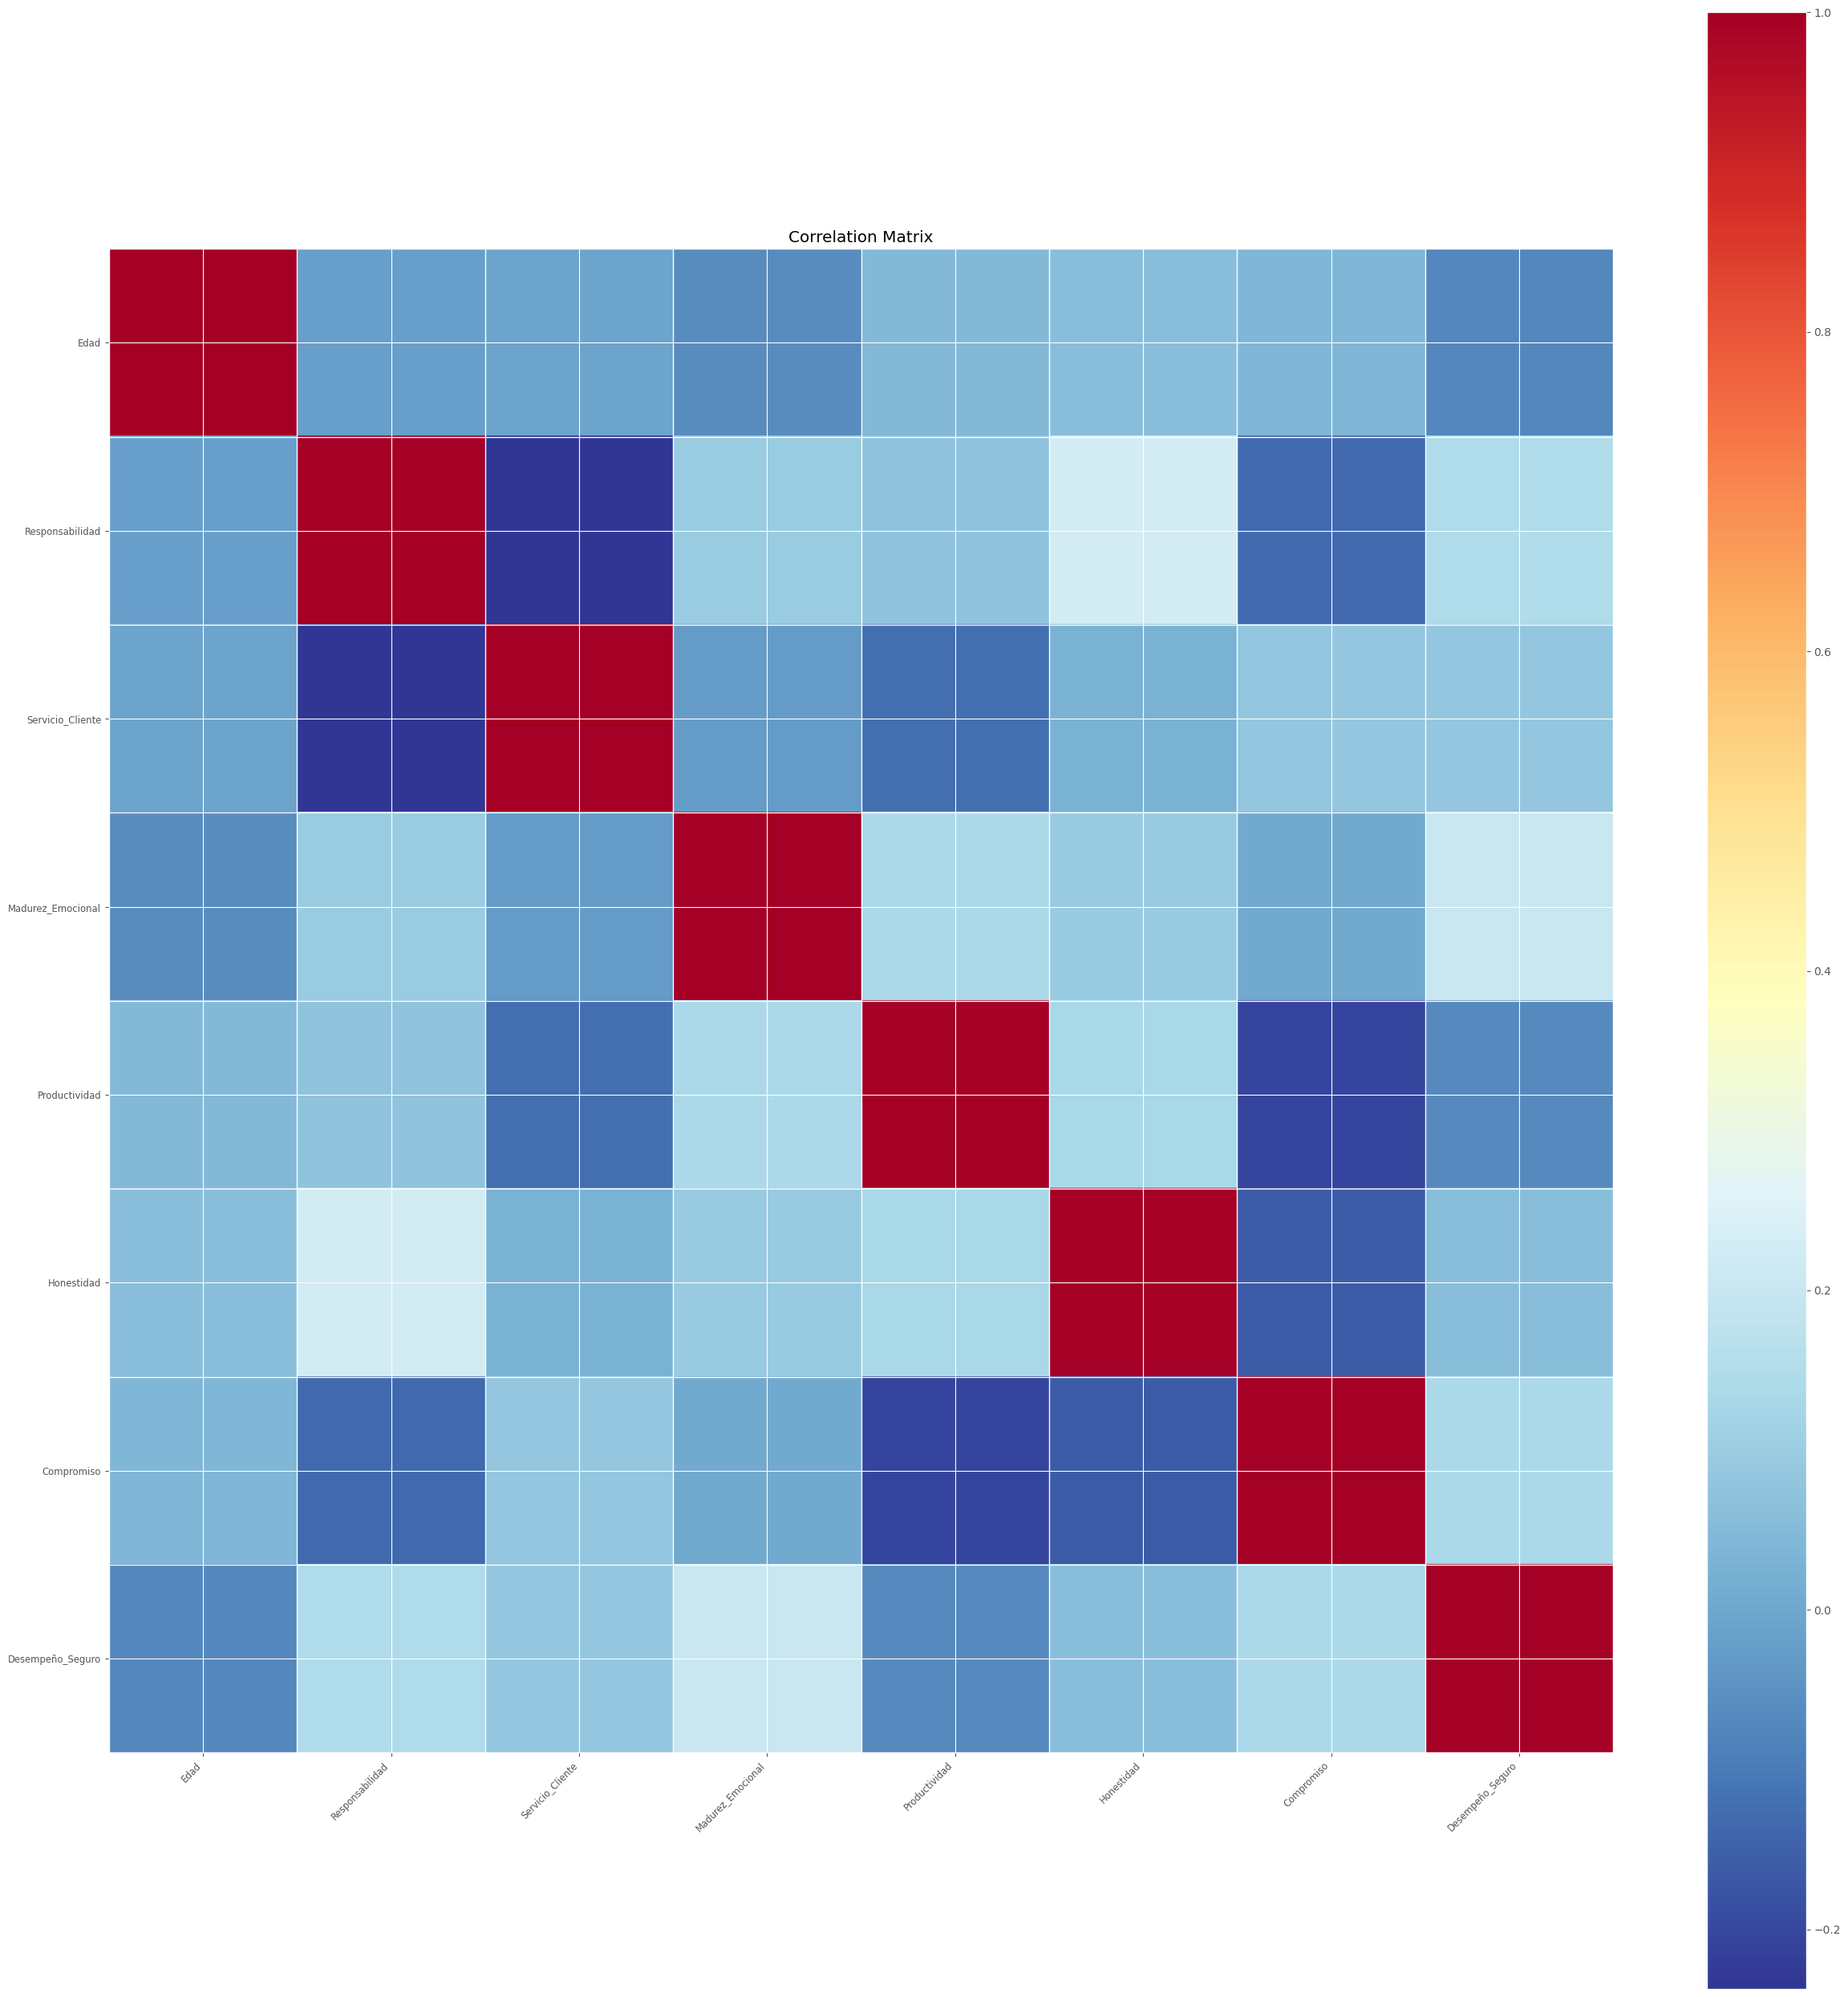

In [36]:
corrret = dfRetirados.set_index('Dias_Permanencia').corr()
sm.graphics.plot_corr(corrret, xnames=list(corrret.columns))
plt.show()

In [37]:
dfRetirados.head()

Edad Genero Tpo_Contrato Estado_Empleado Fecha_Ingreso Fecha_Retiro  \
0    36      M         Fijo        Retirado    2018-02-03   2018-02-19   
1    37      M         Fijo        Retirado    2018-08-02   2020-11-06   
2    40      M         Fijo        Retirado    2018-08-13   2019-02-07   
3    35      M         Fijo        Retirado    2019-02-23   2019-09-20   
4    42      F         Fijo        Retirado    2018-02-17   2019-07-22   

   Dias_Permanencia Motivo_Retiro               Tipo_Cargo  Responsabilidad  \
0                16      Renuncia  Operativos y Auxiliares               42   
1               827      Renuncia  Operativos y Auxiliares               16   
2               178      Renuncia  Operativos y Auxiliares               33   
3               209      Renuncia  Operativos y Auxiliares               24   
4               520      Renuncia  Operativos y Auxiliares               40   

   Servicio_Cliente  Madurez_Emocional  Productividad  Honestidad  Compromiso  \
0                25                 20             10          23          21   
1                11                 31             14           8           3   
2                22                 21             13          22          20   
3                21                 25             17          21           7   
4                23                 31             48          25          40   

   Desempeño_Seguro ERI  
0                37  PS  
1                15  PS  
2                42  PS  
3                17  PS  
4                23  PS

In [38]:
#Eliminar las columnas Fecha_Ingreso y Fecha_Retiro
dfRetirados = dfRetirados.drop(["Fecha_Ingreso", "Fecha_Retiro","Estado_Empleado"], axis=1)
dfRetirados.head()

Edad Genero Tpo_Contrato  Dias_Permanencia Motivo_Retiro  \
0    36      M         Fijo                16      Renuncia   
1    37      M         Fijo               827      Renuncia   
2    40      M         Fijo               178      Renuncia   
3    35      M         Fijo               209      Renuncia   
4    42      F         Fijo               520      Renuncia   

                Tipo_Cargo  Responsabilidad  Servicio_Cliente  \
0  Operativos y Auxiliares               42                25   
1  Operativos y Auxiliares               16                11   
2  Operativos y Auxiliares               33                22   
3  Operativos y Auxiliares               24                21   
4  Operativos y Auxiliares               40                23   

   Madurez_Emocional  Productividad  Honestidad  Compromiso  Desempeño_Seguro  \
0                 20             10          23          21                37   
1                 31             14           8           3                15   
2                 21             13          22          20                42   
3                 25             17          21           7                17   
4                 31             48          25          40                23   

  ERI  
0  PS  
1  PS  
2  PS  
3  PS  
4  PS

In [39]:
#Creacion de variables dummies por cada una de las columnas categiricas
def create_dummy_variables(dfRetirados, columns):
    data_prer = dfRetirados.copy()
    for col in columns:
        dummies = pd.get_dummies(data_prer[col], prefix=col)
        data_prer = pd.concat([data_prer, dummies], axis=1)
        data_prer.drop(col, axis=1, inplace=True)
    return data_prer

In [40]:
CatColsret = dfRetirados.select_dtypes(include=["object"]).columns.tolist()
dfRetirados[CatColsret].columns
data_prer = create_dummy_variables(dfRetirados, CatColsret)
data_prer.head()

Edad  Dias_Permanencia  Responsabilidad  Servicio_Cliente  \
0    36                16               42                25   
1    37               827               16                11   
2    40               178               33                22   
3    35               209               24                21   
4    42               520               40                23   

   Madurez_Emocional  Productividad  Honestidad  Compromiso  Desempeño_Seguro  \
0                 20             10          23          21                37   
1                 31             14           8           3                15   
2                 21             13          22          20                42   
3                 25             17          21           7                17   
4                 31             48          25          40                23   

   Genero_F  ...  Tipo_Cargo_Asistentes y Técnicos  \
0         0  ...                                 0   
1         0  ...                                 0   
2         0  ...                                 0   
3         0  ...                                 0   
4         1  ...                                 0   

   Tipo_Cargo_Gerentes y Directores  Tipo_Cargo_Jefes  \
0                                 0                 0   
1                                 0                 0   
2                                 0                 0   
3                                 0                 0   
4                                 0                 0   

   Tipo_Cargo_Líderes, Coordinadores y Supervisores  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Tipo_Cargo_Operativos y Auxiliares  Tipo_Cargo_Practicante / Aprendiz  \
0                                   1                                  0   
1                                   1                                  0   
2                                   1                                  0   
3                                   1                                  0   
4                                   1                                  0   

   ERI_DP  ERI_FP  ERI_NV  ERI_PS  
0       0       0       0       1  
1       0       0       0       1  
2       0       0       0       1  
3       0       0       0       1  
4       0       0       0       1  

[5 rows x 31 columns]

In [41]:
#Identificamos las variables categoricas y convertimos en lista
CatColsret = dfRetirados.select_dtypes(include=["object"]).columns.tolist()
dfRetirados[CatColsret].columns

Index(['Genero', 'Tpo_Contrato', 'Motivo_Retiro', 'Tipo_Cargo', 'ERI'], dtype='object')

In [42]:
#Identificamos las variables Numericas y convertimos en lista
NumColsRet = dfRetirados.select_dtypes(include=['int64','float64']).columns.tolist()
df[NumColsRet].head()

Edad  Dias_Permanencia  Responsabilidad  Servicio_Cliente  \
0    36                16               42                25   
1    37               827               16                11   
2    40               178               33                22   
3    35               209               24                21   
4    42               520               40                23   

   Madurez_Emocional  Productividad  Honestidad  Compromiso  Desempeño_Seguro  
0                 20             10          23          21                37  
1                 31             14           8           3                15  
2                 21             13          22          20                42  
3                 25             17          21           7                17  
4                 31             48          25          40                23

In [43]:
#visualizaos todo el contenido por cada variable
for ind, col in enumerate(df[CatColsret].columns):
    print('==============================')
    print(df.groupby(col).Genero.count().sort_values(ascending=False))

Genero
M    7619
F    3610
Name: Genero, dtype: int64
Tpo_Contrato
Fijo          7679
Indefinido    3550
Name: Genero, dtype: int64
Motivo_Retiro
NO APLICA                                   6001
Renuncia                                    3219
Terminación Dentro Del Periodo De Prueba     795
Terminacion Contrato Termino Fijo            414
Terminación Sin Justa Causa                  356
Terminación Con Justa Causa                  346
Mutuo Acuerdo                                 90
Fallecimiento                                  8
Name: Genero, dtype: int64
Tipo_Cargo
Operativos y Auxiliares                  9264
Asistentes y Técnicos                     967
Analistas y Profesionales                 432
Practicante / Aprendiz                    258
Líderes, Coordinadores y Supervisores     247
Jefes                                      42
Gerentes y Directores                      19
Name: Genero, dtype: int64
ERI
DP    5618
PS    4777
FP     812
NV      22
Name: Genero, dtype: int64


In [44]:
#realizo un describe solo a variabls numericas ara estos porcentajes
dfRetirados.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.975])

Edad  Dias_Permanencia  Responsabilidad  Servicio_Cliente  \
count  5228.000000       5228.000000      5228.000000       5228.000000   
mean     31.989288        205.587414        25.555279         22.074407   
std       7.659101        212.353997         9.035218          9.168533   
min      18.000000          0.000000         1.000000          1.000000   
1%       20.000000          1.000000         4.000000          5.000000   
10%      24.000000         16.000000        14.000000         12.000000   
20%      25.000000         38.000000        18.000000         14.000000   
30%      27.000000         56.000000        21.000000         16.000000   
40%      29.000000         83.000000        23.000000         18.000000   
50%      30.000000        134.000000        26.000000         20.000000   
60%      32.000000        182.000000        28.000000         23.000000   
70%      35.000000        250.000000        31.000000         26.000000   
80%      38.000000        357.000000        34.000000         30.000000   
90%      43.000000        528.000000        37.000000         37.000000   
97.5%    50.000000        813.000000        42.000000         41.000000   
max      82.000000       1080.000000        48.000000         45.000000   

       Madurez_Emocional  Productividad   Honestidad   Compromiso  \
count        5228.000000    5228.000000  5228.000000  5228.000000   
mean           19.396519      12.676932    15.375669    15.596213   
std             7.007594       6.613425     5.755163    14.502018   
min             1.000000       1.000000     1.000000     1.000000   
1%              1.000000       1.000000     1.000000     1.000000   
10%            10.000000       5.000000     8.000000     1.000000   
20%            13.000000       8.000000    11.000000     4.000000   
30%            16.000000      10.000000    13.000000     7.000000   
40%            18.000000      11.000000    14.000000     9.000000   
50%            20.000000      13.000000    16.000000    11.000000   
60%            21.000000      14.000000    17.000000    14.000000   
70%            24.000000      15.000000    18.000000    18.000000   
80%            25.000000      17.000000    20.000000    23.000000   
90%            28.000000      19.000000    22.000000    48.000000   
97.5%          32.000000      23.000000    26.000000    48.000000   
max            48.000000      48.000000    48.000000    48.000000   

       Desempeño_Seguro  
count       5228.000000  
mean          20.697590  
std           10.709541  
min            1.000000  
1%             1.000000  
10%            7.000000  
20%           12.000000  
30%           15.000000  
40%           17.000000  
50%           20.000000  
60%           22.000000  
70%           24.000000  
80%           31.000000  
90%           35.000000  
97.5%         45.000000  
max           48.000000

<Axes: xlabel='Desempeño_Seguro'>

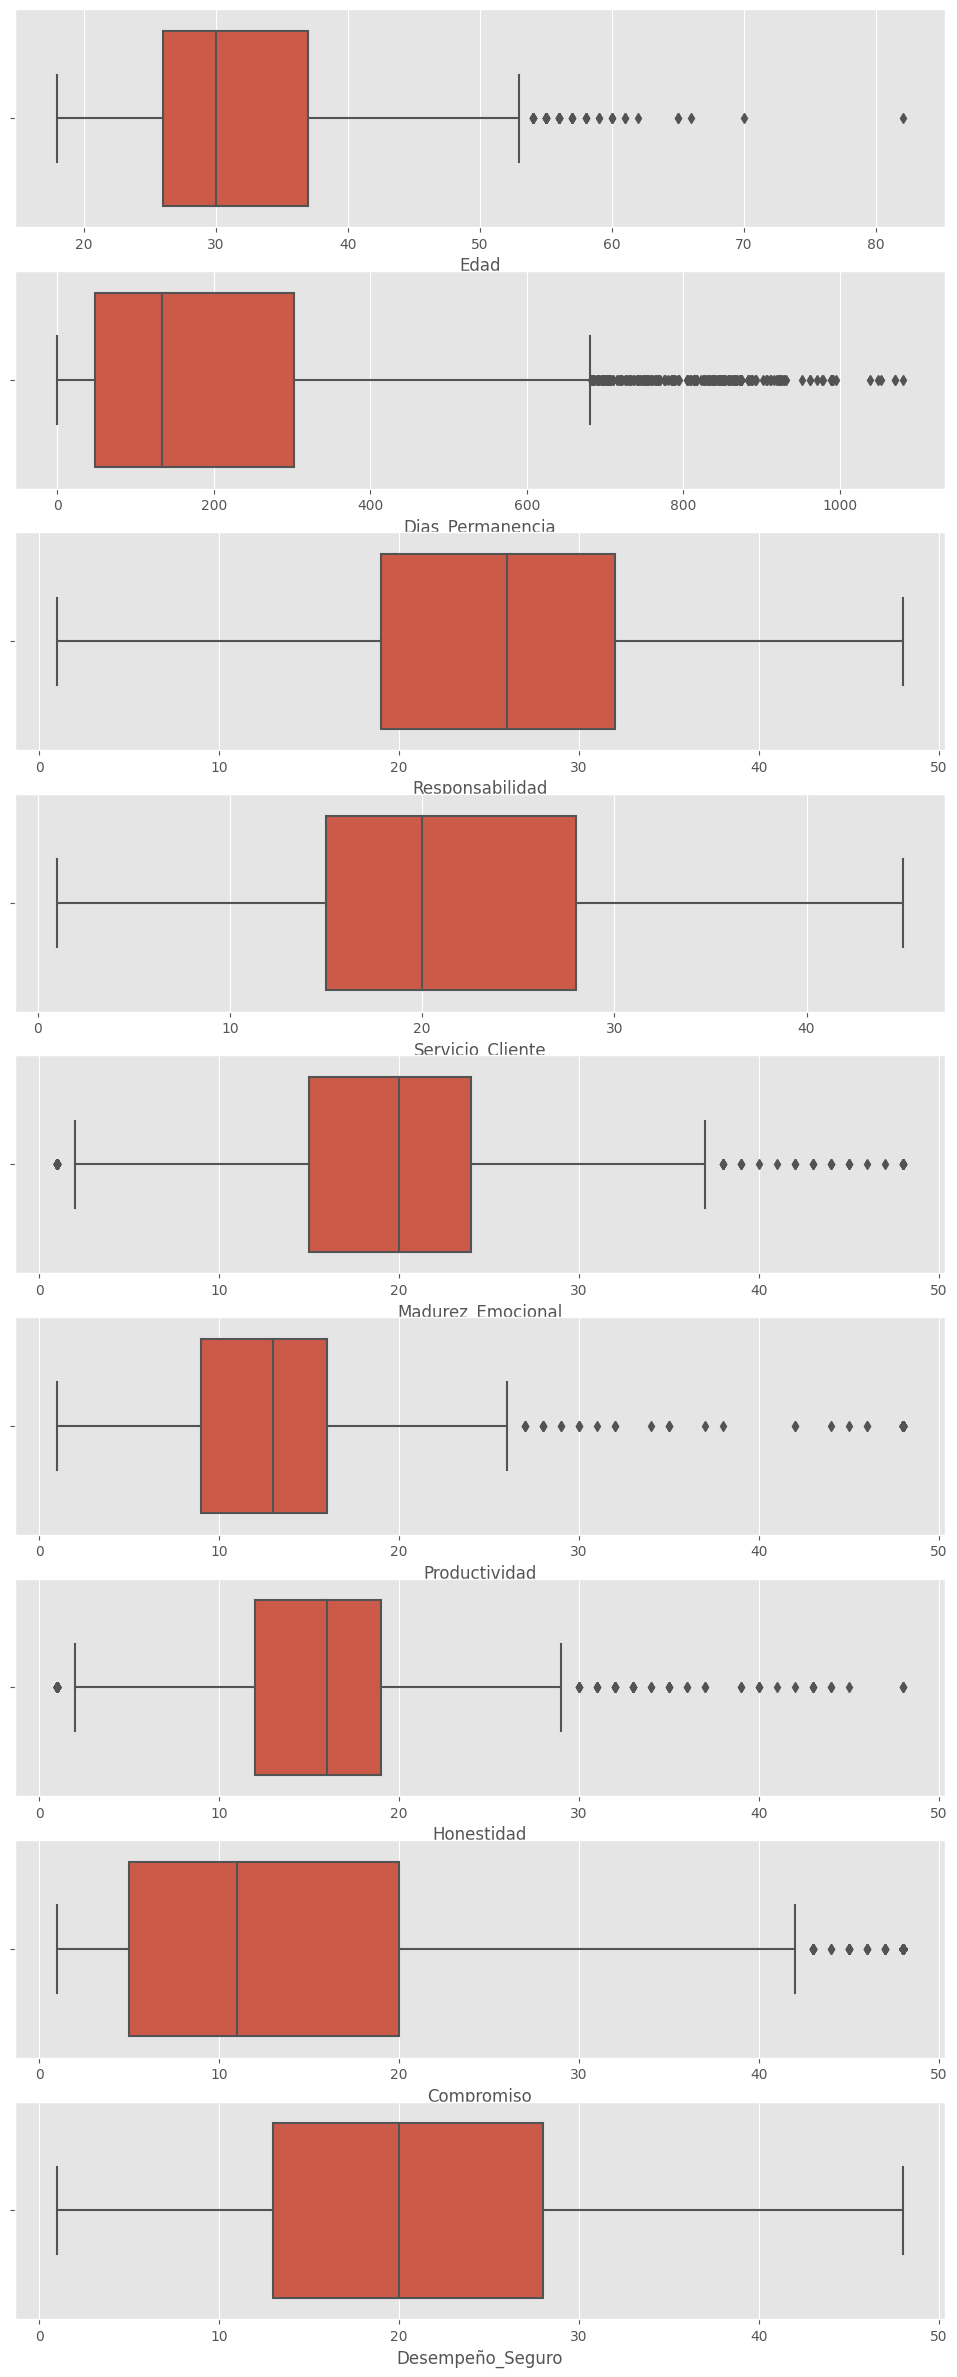

In [45]:
#identificamos valores Atipicos en variables Numericas para eso usamos grafico de bigotes
#Laura tendra que definirme si recortamos los intervalos
plt.rcParams['figure.figsize'] = (12,30)
fig, axs = plt.subplots(9, 1)

sns.boxplot(ax=axs[0], x=dfRetirados.Edad)
sns.boxplot(ax=axs[1], x=dfRetirados.Dias_Permanencia)
sns.boxplot(ax=axs[2], x=dfRetirados.Responsabilidad)
sns.boxplot(ax=axs[3], x=dfRetirados.Servicio_Cliente)
sns.boxplot(ax=axs[4], x=dfRetirados.Madurez_Emocional)
sns.boxplot(ax=axs[5], x=dfRetirados.Productividad)
sns.boxplot(ax=axs[6], x=dfRetirados.Honestidad)
sns.boxplot(ax=axs[7], x=dfRetirados.Compromiso)
sns.boxplot(ax=axs[8], x=dfRetirados.Desempeño_Seguro)

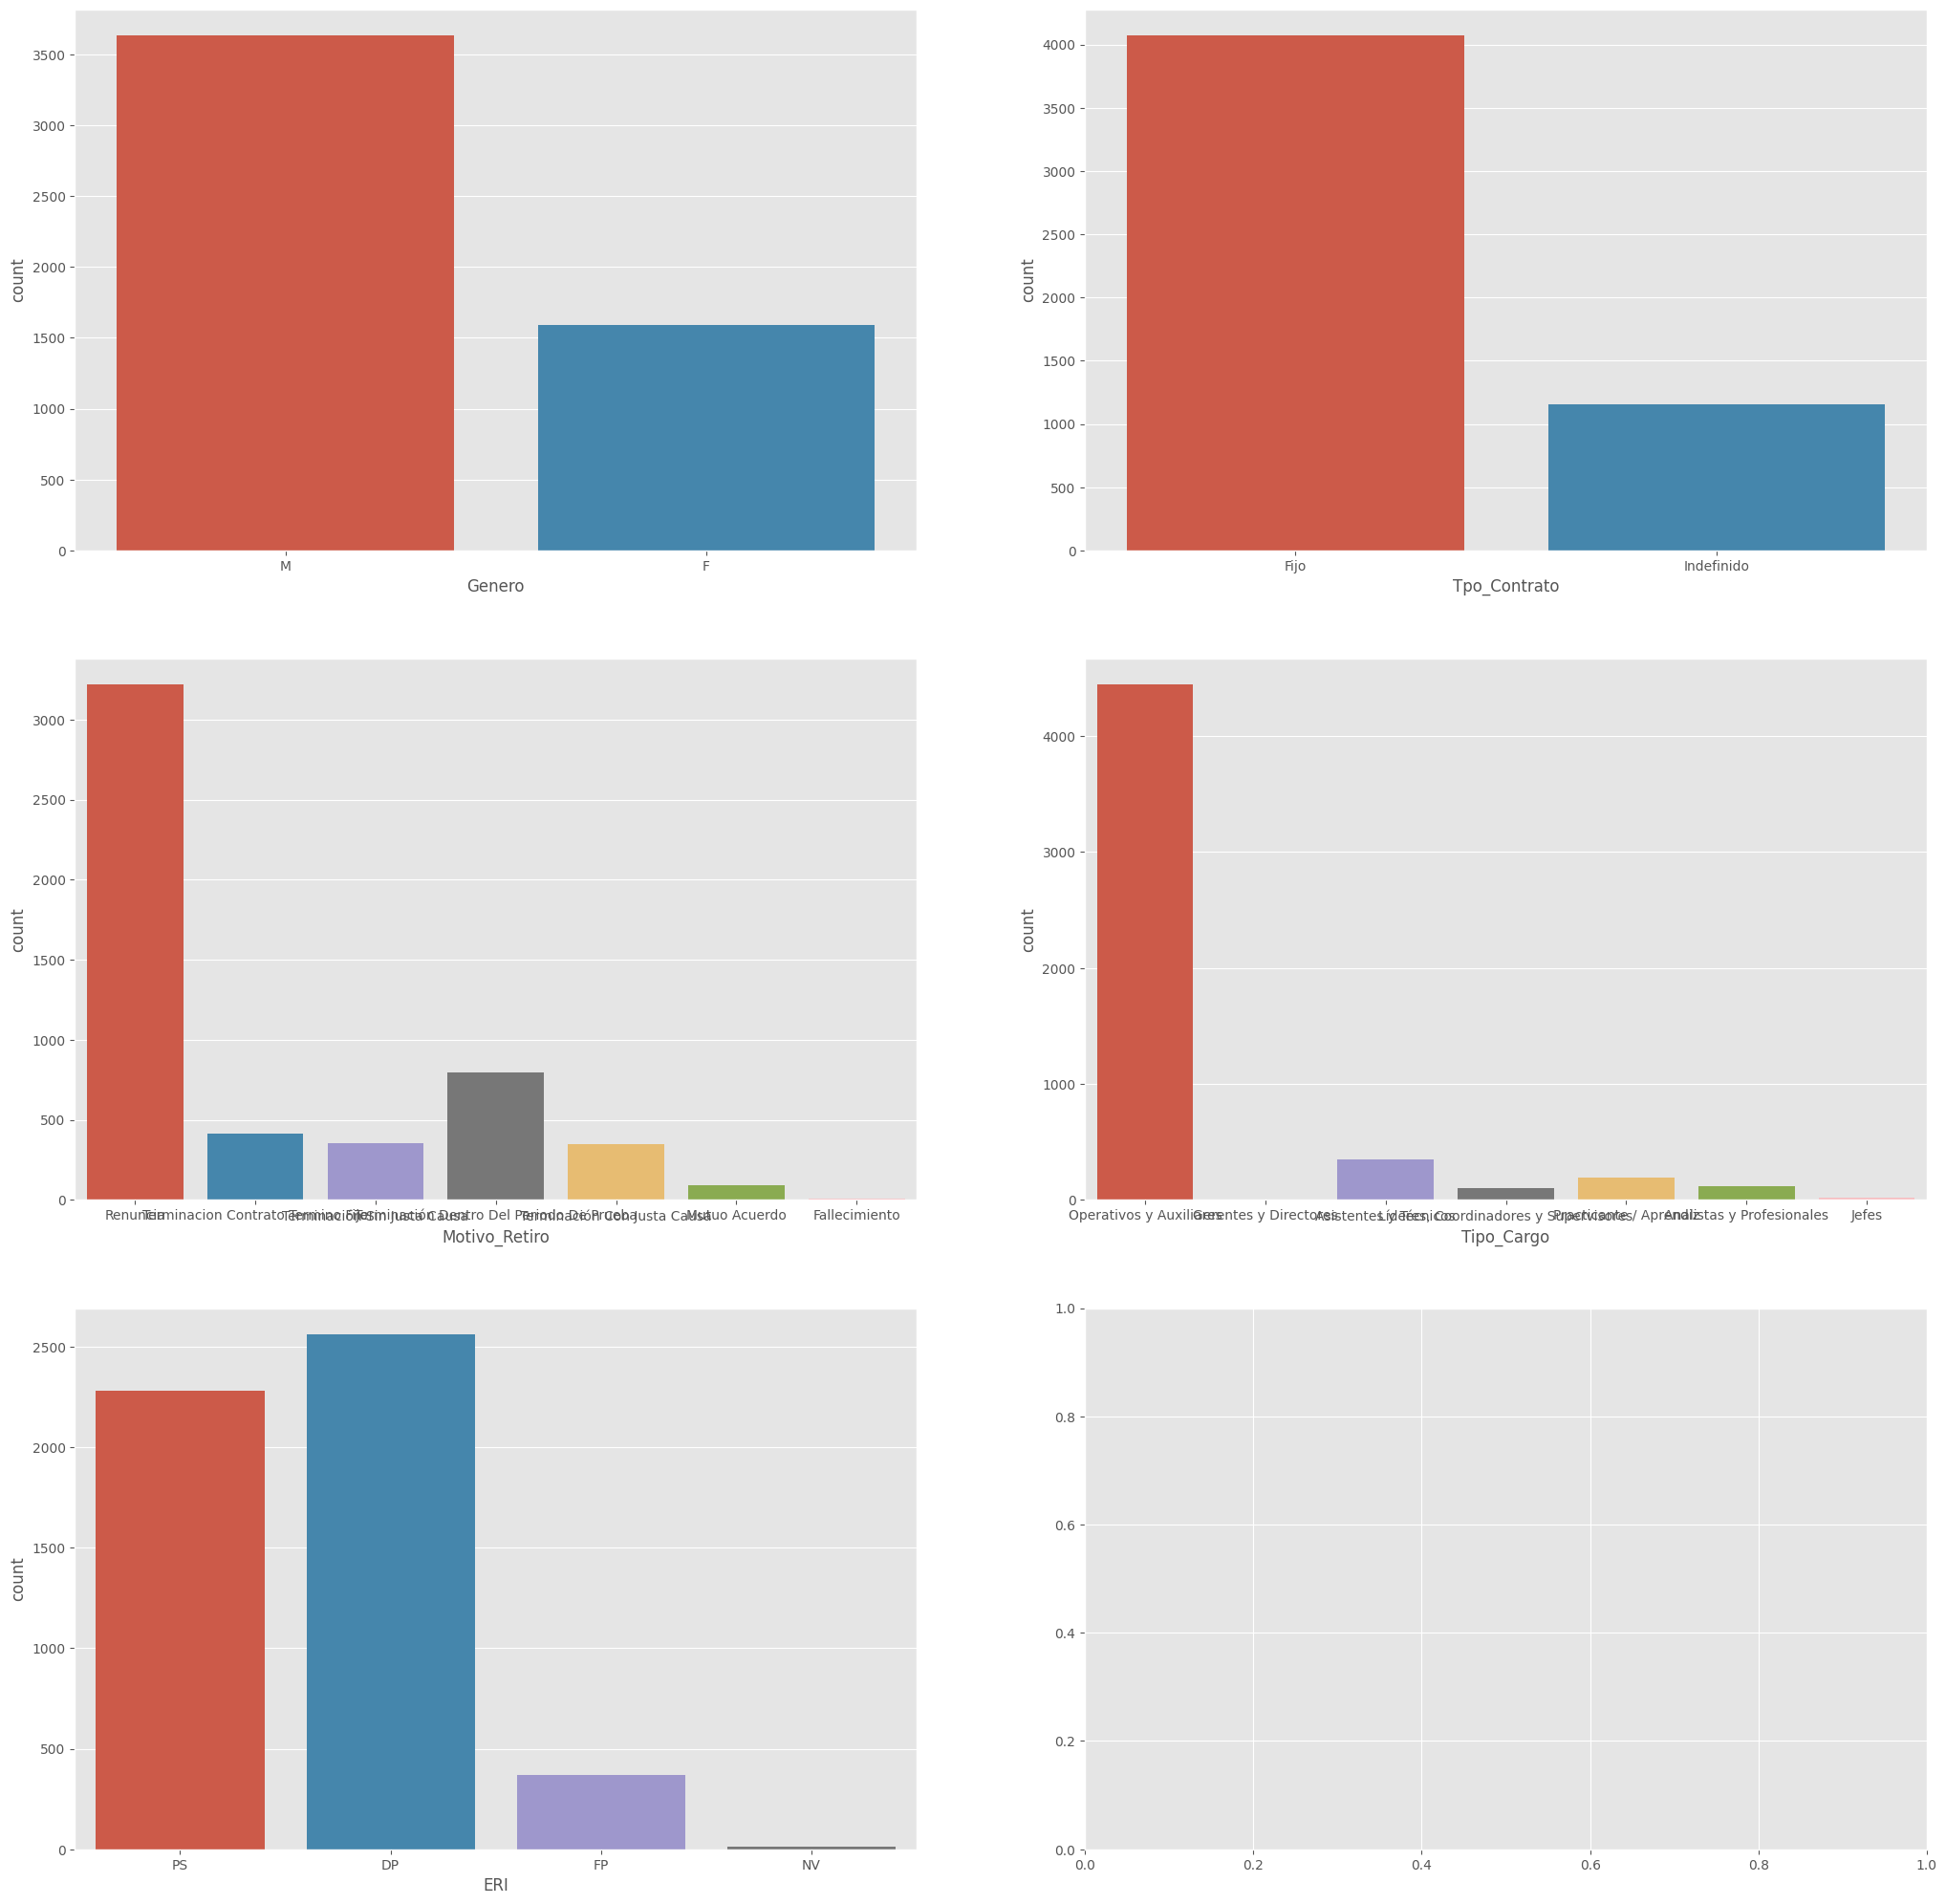

In [46]:
#Graficamos las variables categoricas
plot_multiples_graficas(dfRetirados,CatColsret,2,3,'c',None,(25,25))

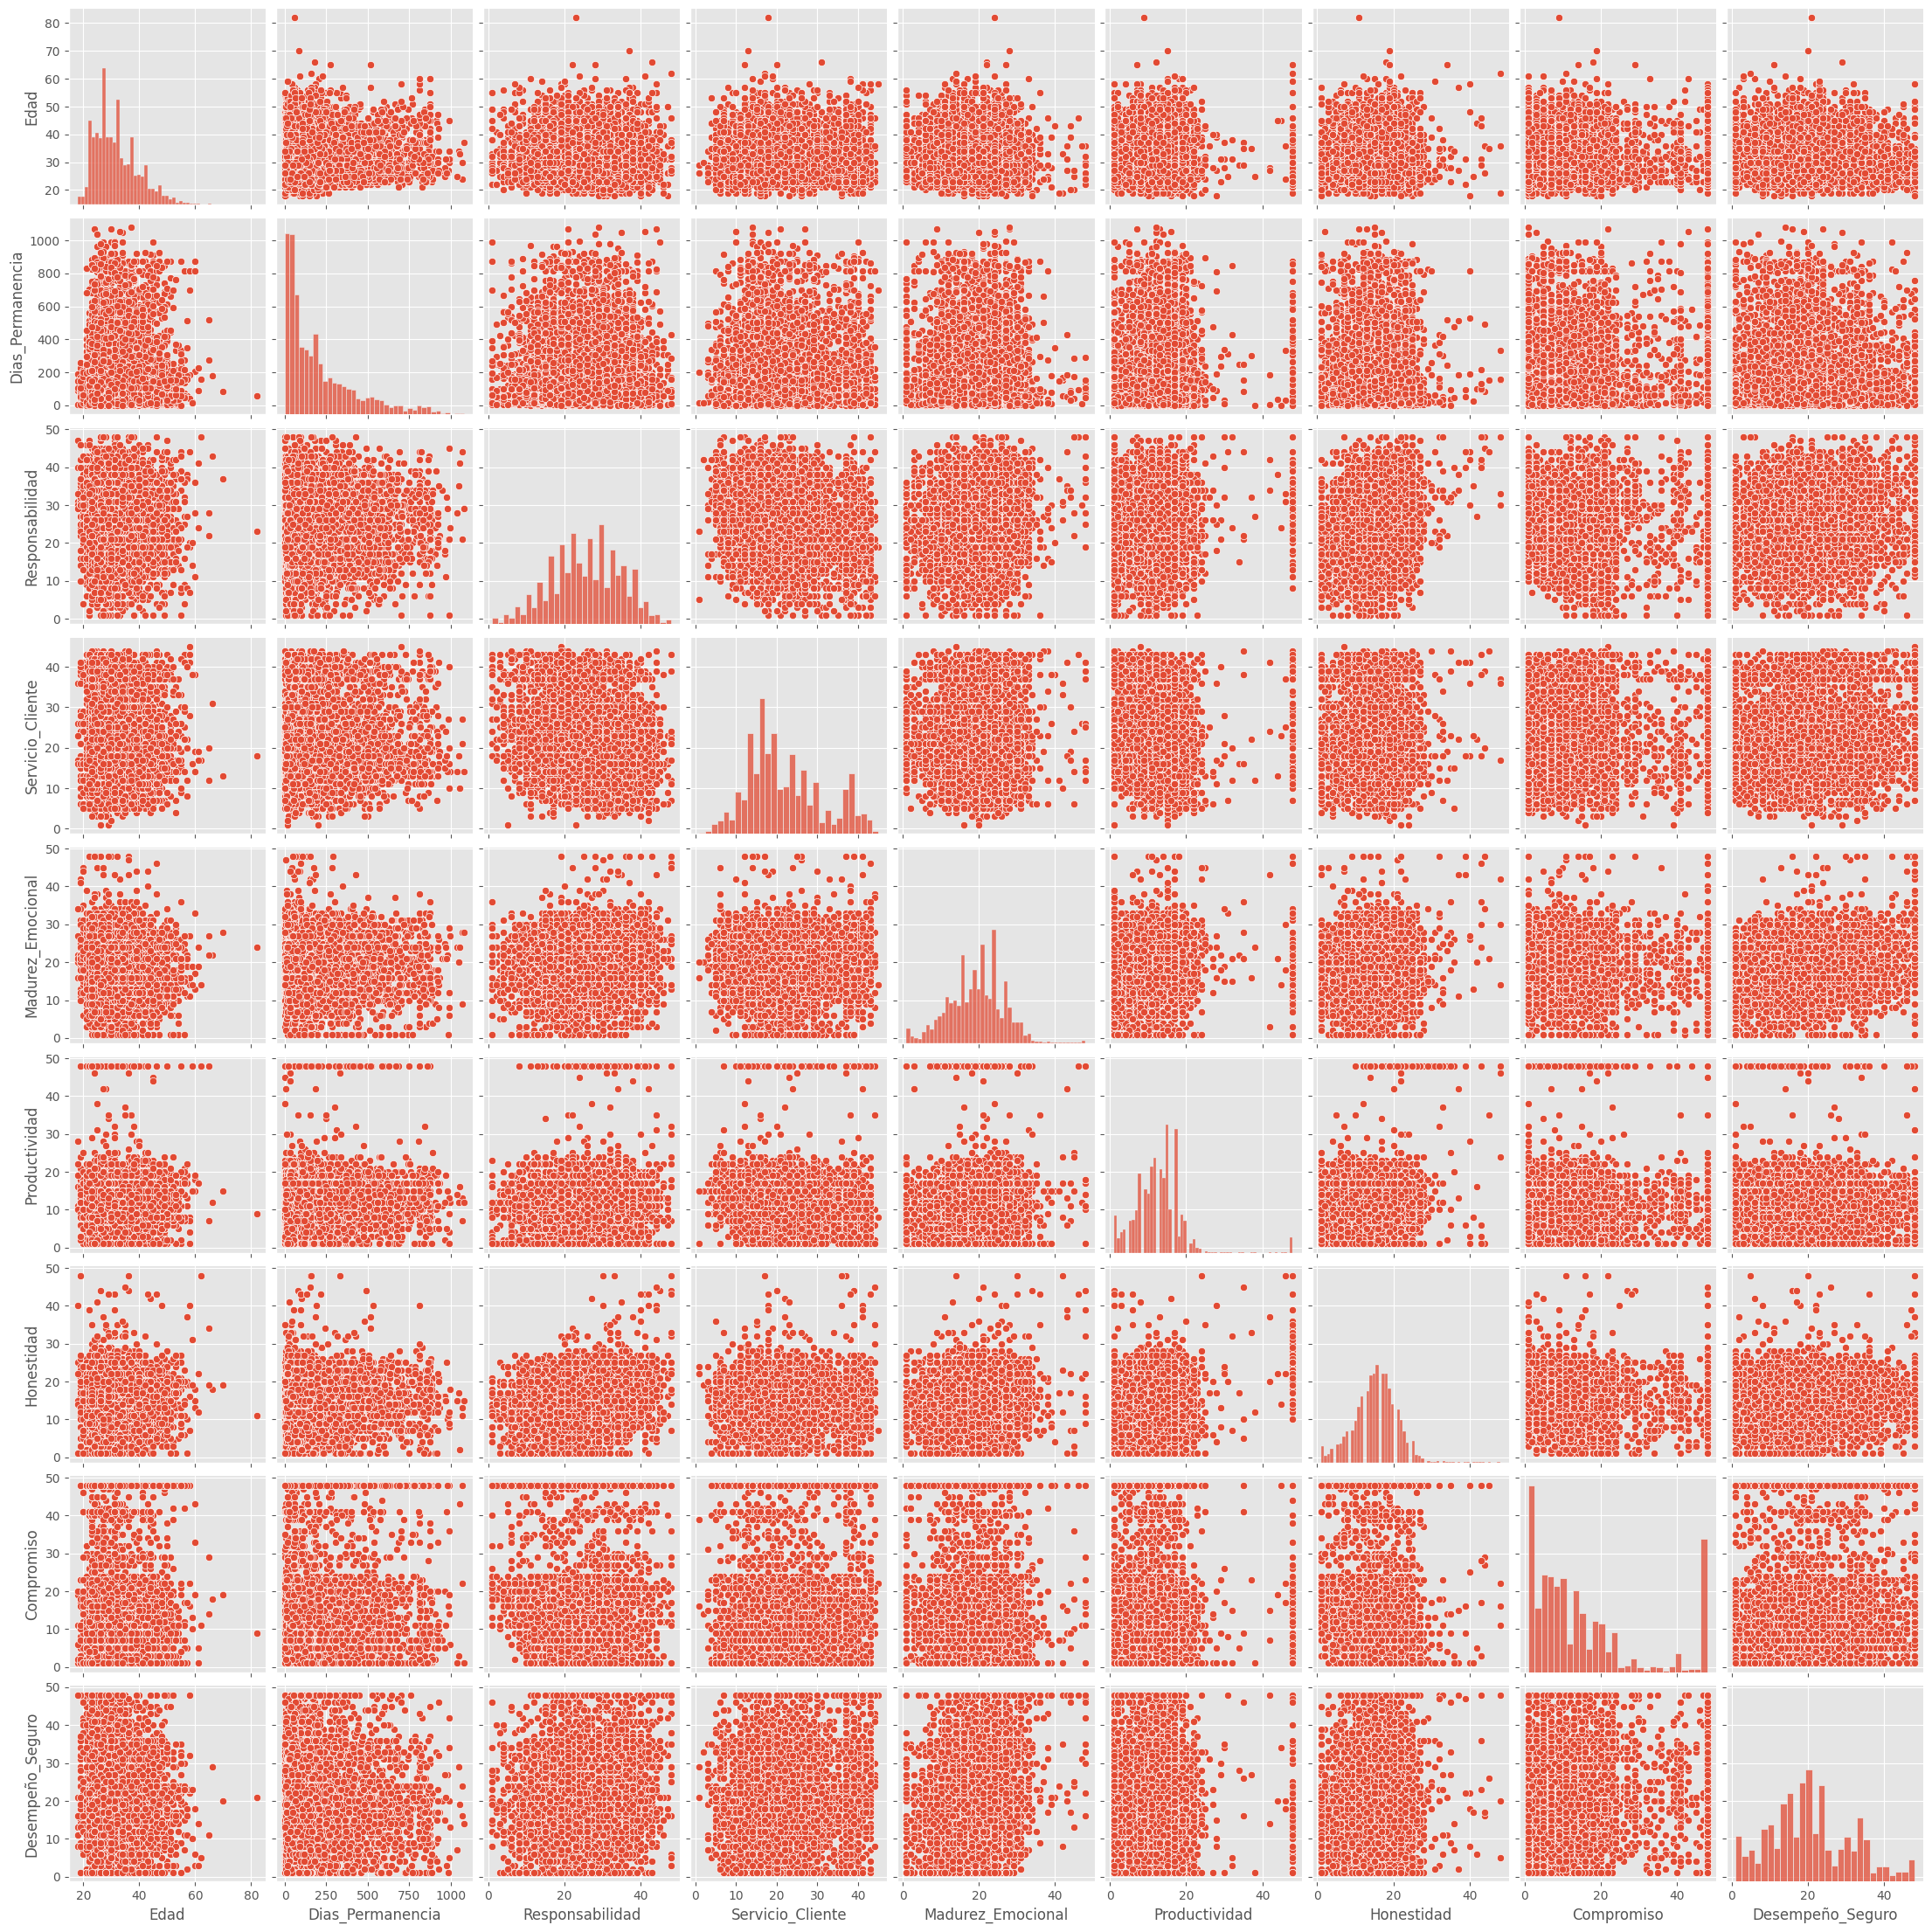

In [47]:
#graficamos las variables Numericas
sns.pairplot(dfRetirados[NumColsRet])

**Normalización de los datos para el Df data_prer**

In [48]:
data_normRet = (data_prer-data_prer.min())/(data_prer.max()-data_prer.min())
data_normRet.head()

Edad  Dias_Permanencia  Responsabilidad  Servicio_Cliente  \
0  0.281250          0.014815         0.872340          0.545455   
1  0.296875          0.765741         0.319149          0.227273   
2  0.343750          0.164815         0.680851          0.477273   
3  0.265625          0.193519         0.489362          0.454545   
4  0.375000          0.481481         0.829787          0.500000   

   Madurez_Emocional  Productividad  Honestidad  Compromiso  Desempeño_Seguro  \
0           0.404255       0.191489    0.468085    0.425532          0.765957   
1           0.638298       0.276596    0.148936    0.042553          0.297872   
2           0.425532       0.255319    0.446809    0.404255          0.872340   
3           0.510638       0.340426    0.425532    0.127660          0.340426   
4           0.638298       1.000000    0.510638    0.829787          0.468085   

   Genero_F  ...  Tipo_Cargo_Asistentes y Técnicos  \
0       0.0  ...                               0.0   
1       0.0  ...                               0.0   
2       0.0  ...                               0.0   
3       0.0  ...                               0.0   
4       1.0  ...                               0.0   

   Tipo_Cargo_Gerentes y Directores  Tipo_Cargo_Jefes  \
0                               0.0               0.0   
1                               0.0               0.0   
2                               0.0               0.0   
3                               0.0               0.0   
4                               0.0               0.0   

   Tipo_Cargo_Líderes, Coordinadores y Supervisores  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   Tipo_Cargo_Operativos y Auxiliares  Tipo_Cargo_Practicante / Aprendiz  \
0                                 1.0                                0.0   
1                                 1.0                                0.0   
2                                 1.0                                0.0   
3                                 1.0                                0.0   
4                                 1.0                                0.0   

   ERI_DP  ERI_FP  ERI_NV  ERI_PS  
0     0.0     0.0     0.0     1.0  
1     0.0     0.0     0.0     1.0  
2     0.0     0.0     0.0     1.0  
3     0.0     0.0     0.0     1.0  
4     0.0     0.0     0.0     1.0  

[5 rows x 31 columns]

**Hallar el número de clusters óptimo**

In [49]:
#from sklearn.cluster import KMeans
wcss=[]

for i in range(1,21):
  kmeans = KMeans(n_clusters=i,max_iter=300)
  kmeans.fit(data_normRet)
  wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

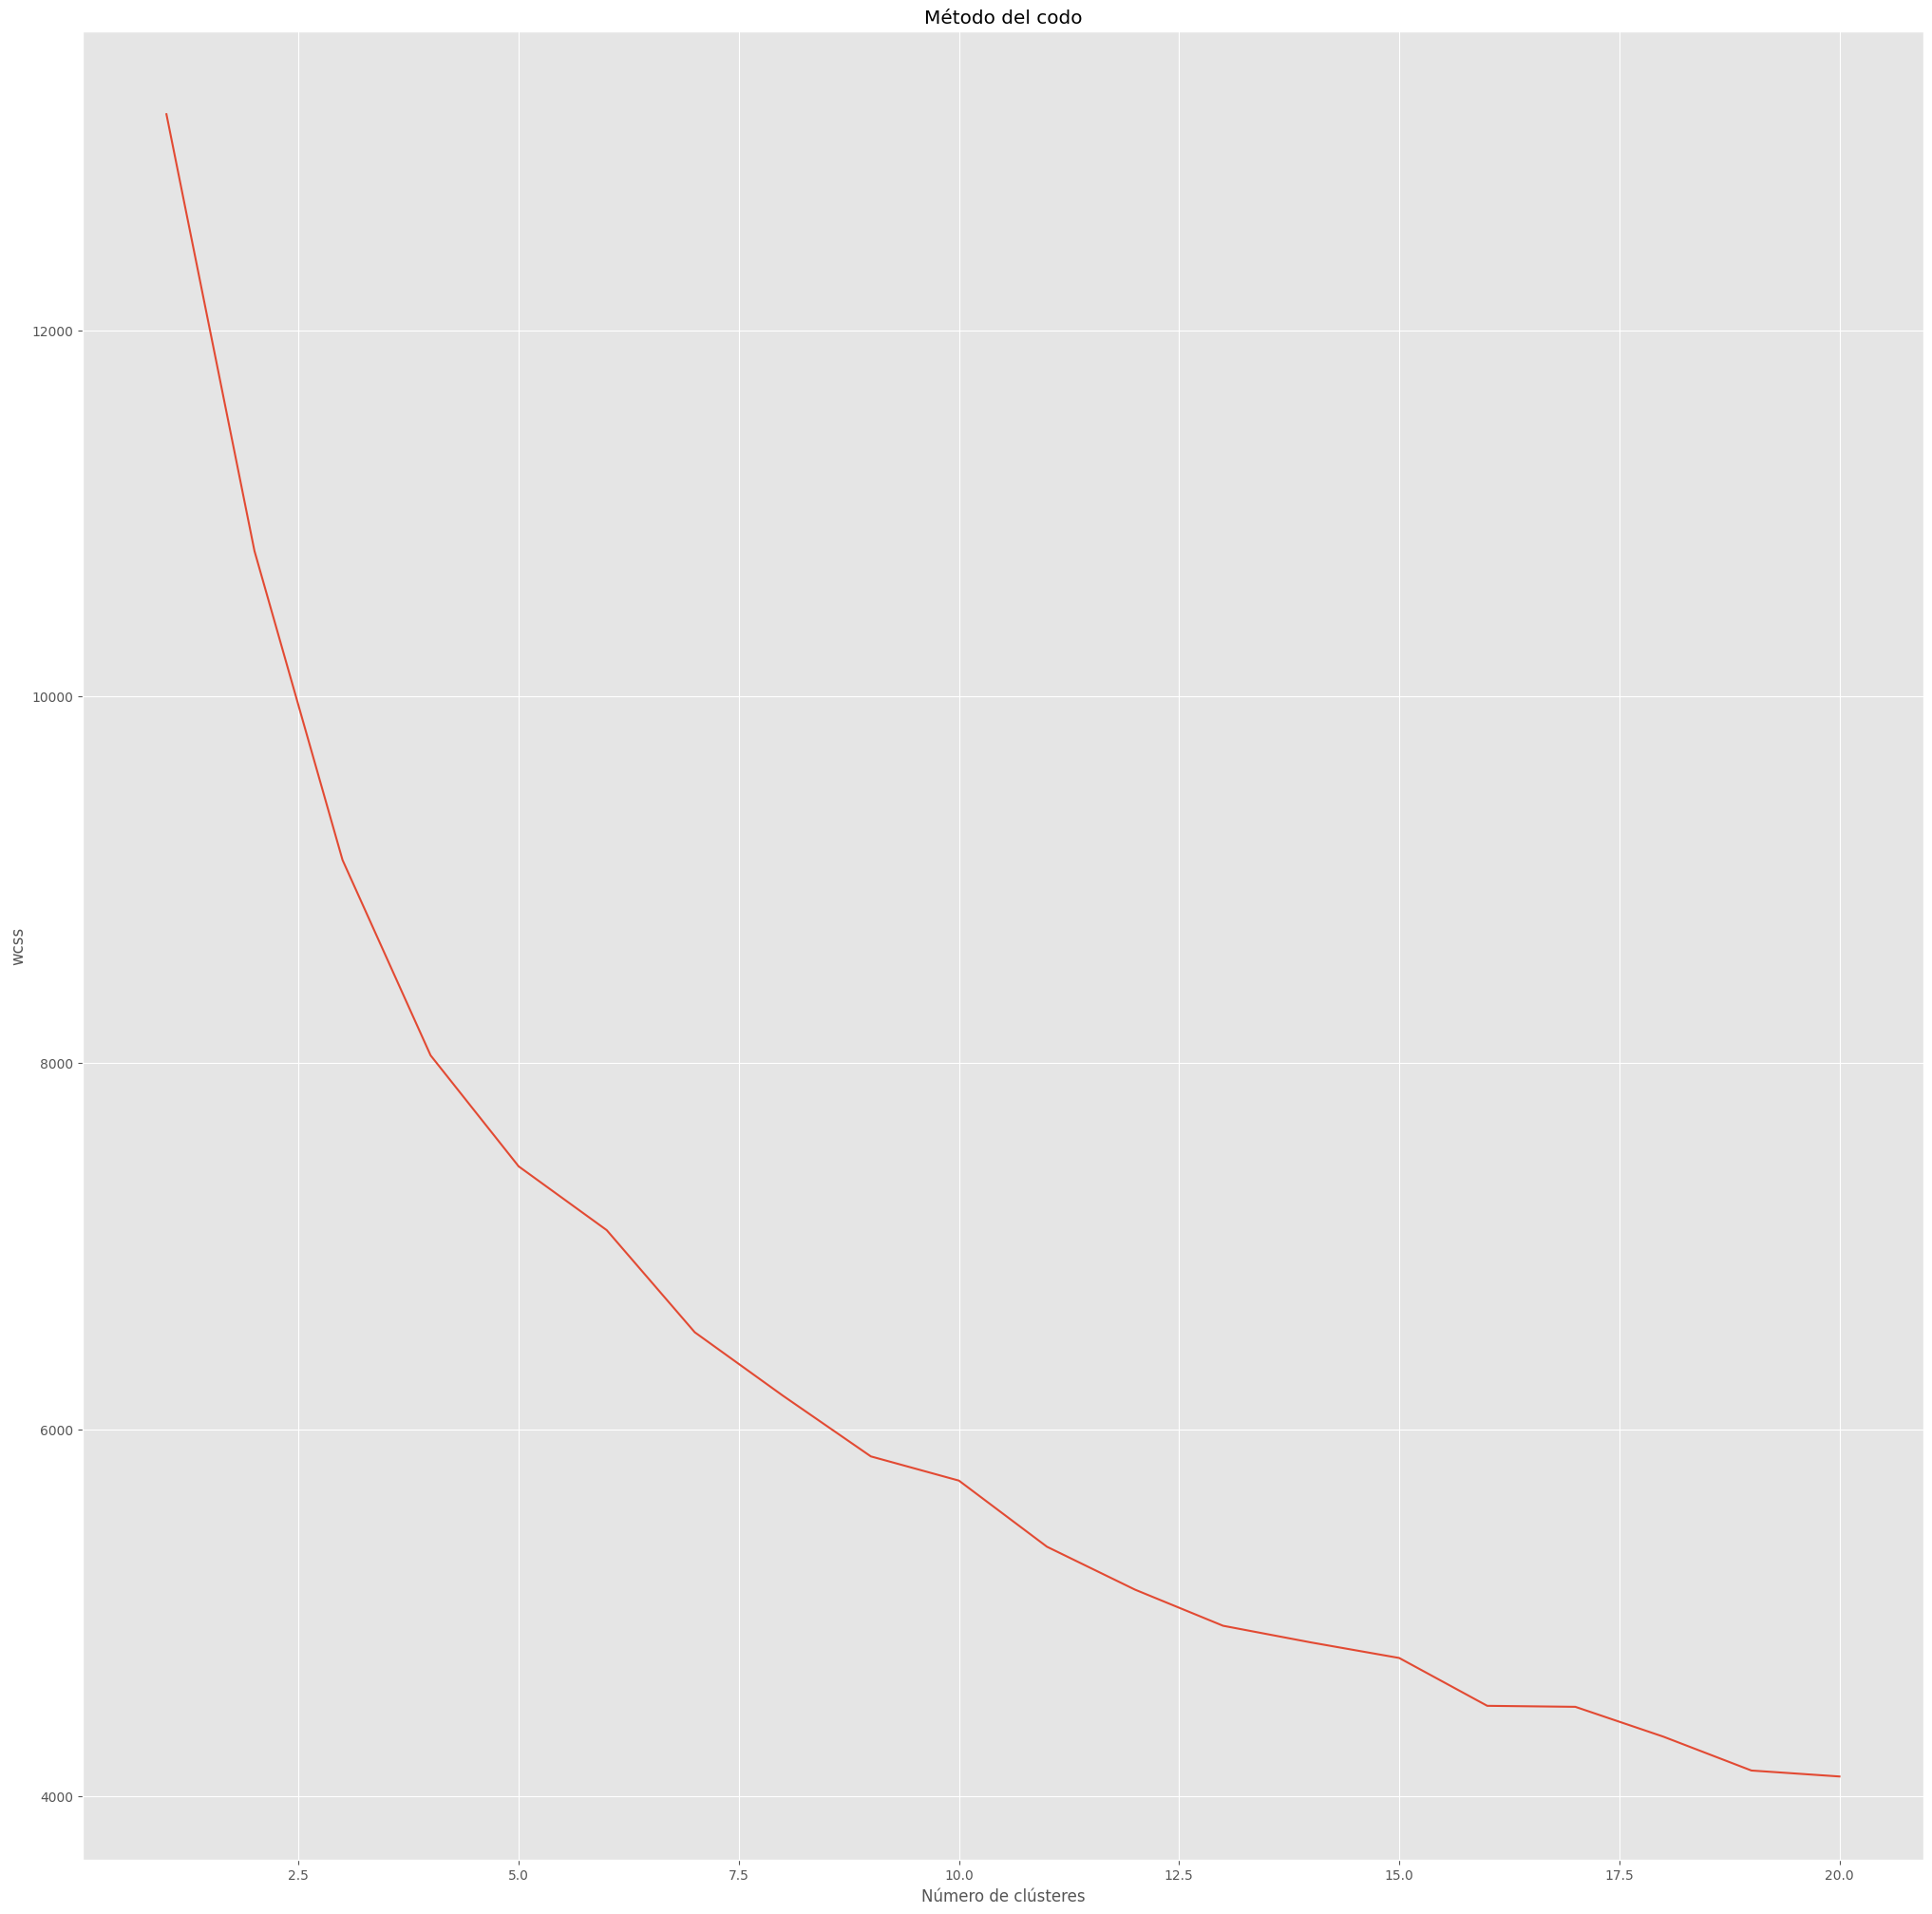

In [50]:
plt.plot(range(1,21),wcss)
plt.title("Método del codo")
plt.xlabel("Número de clústeres")
plt.ylabel("wcss")

Text(0.5, 1.0, 'Indice de Silhouette')

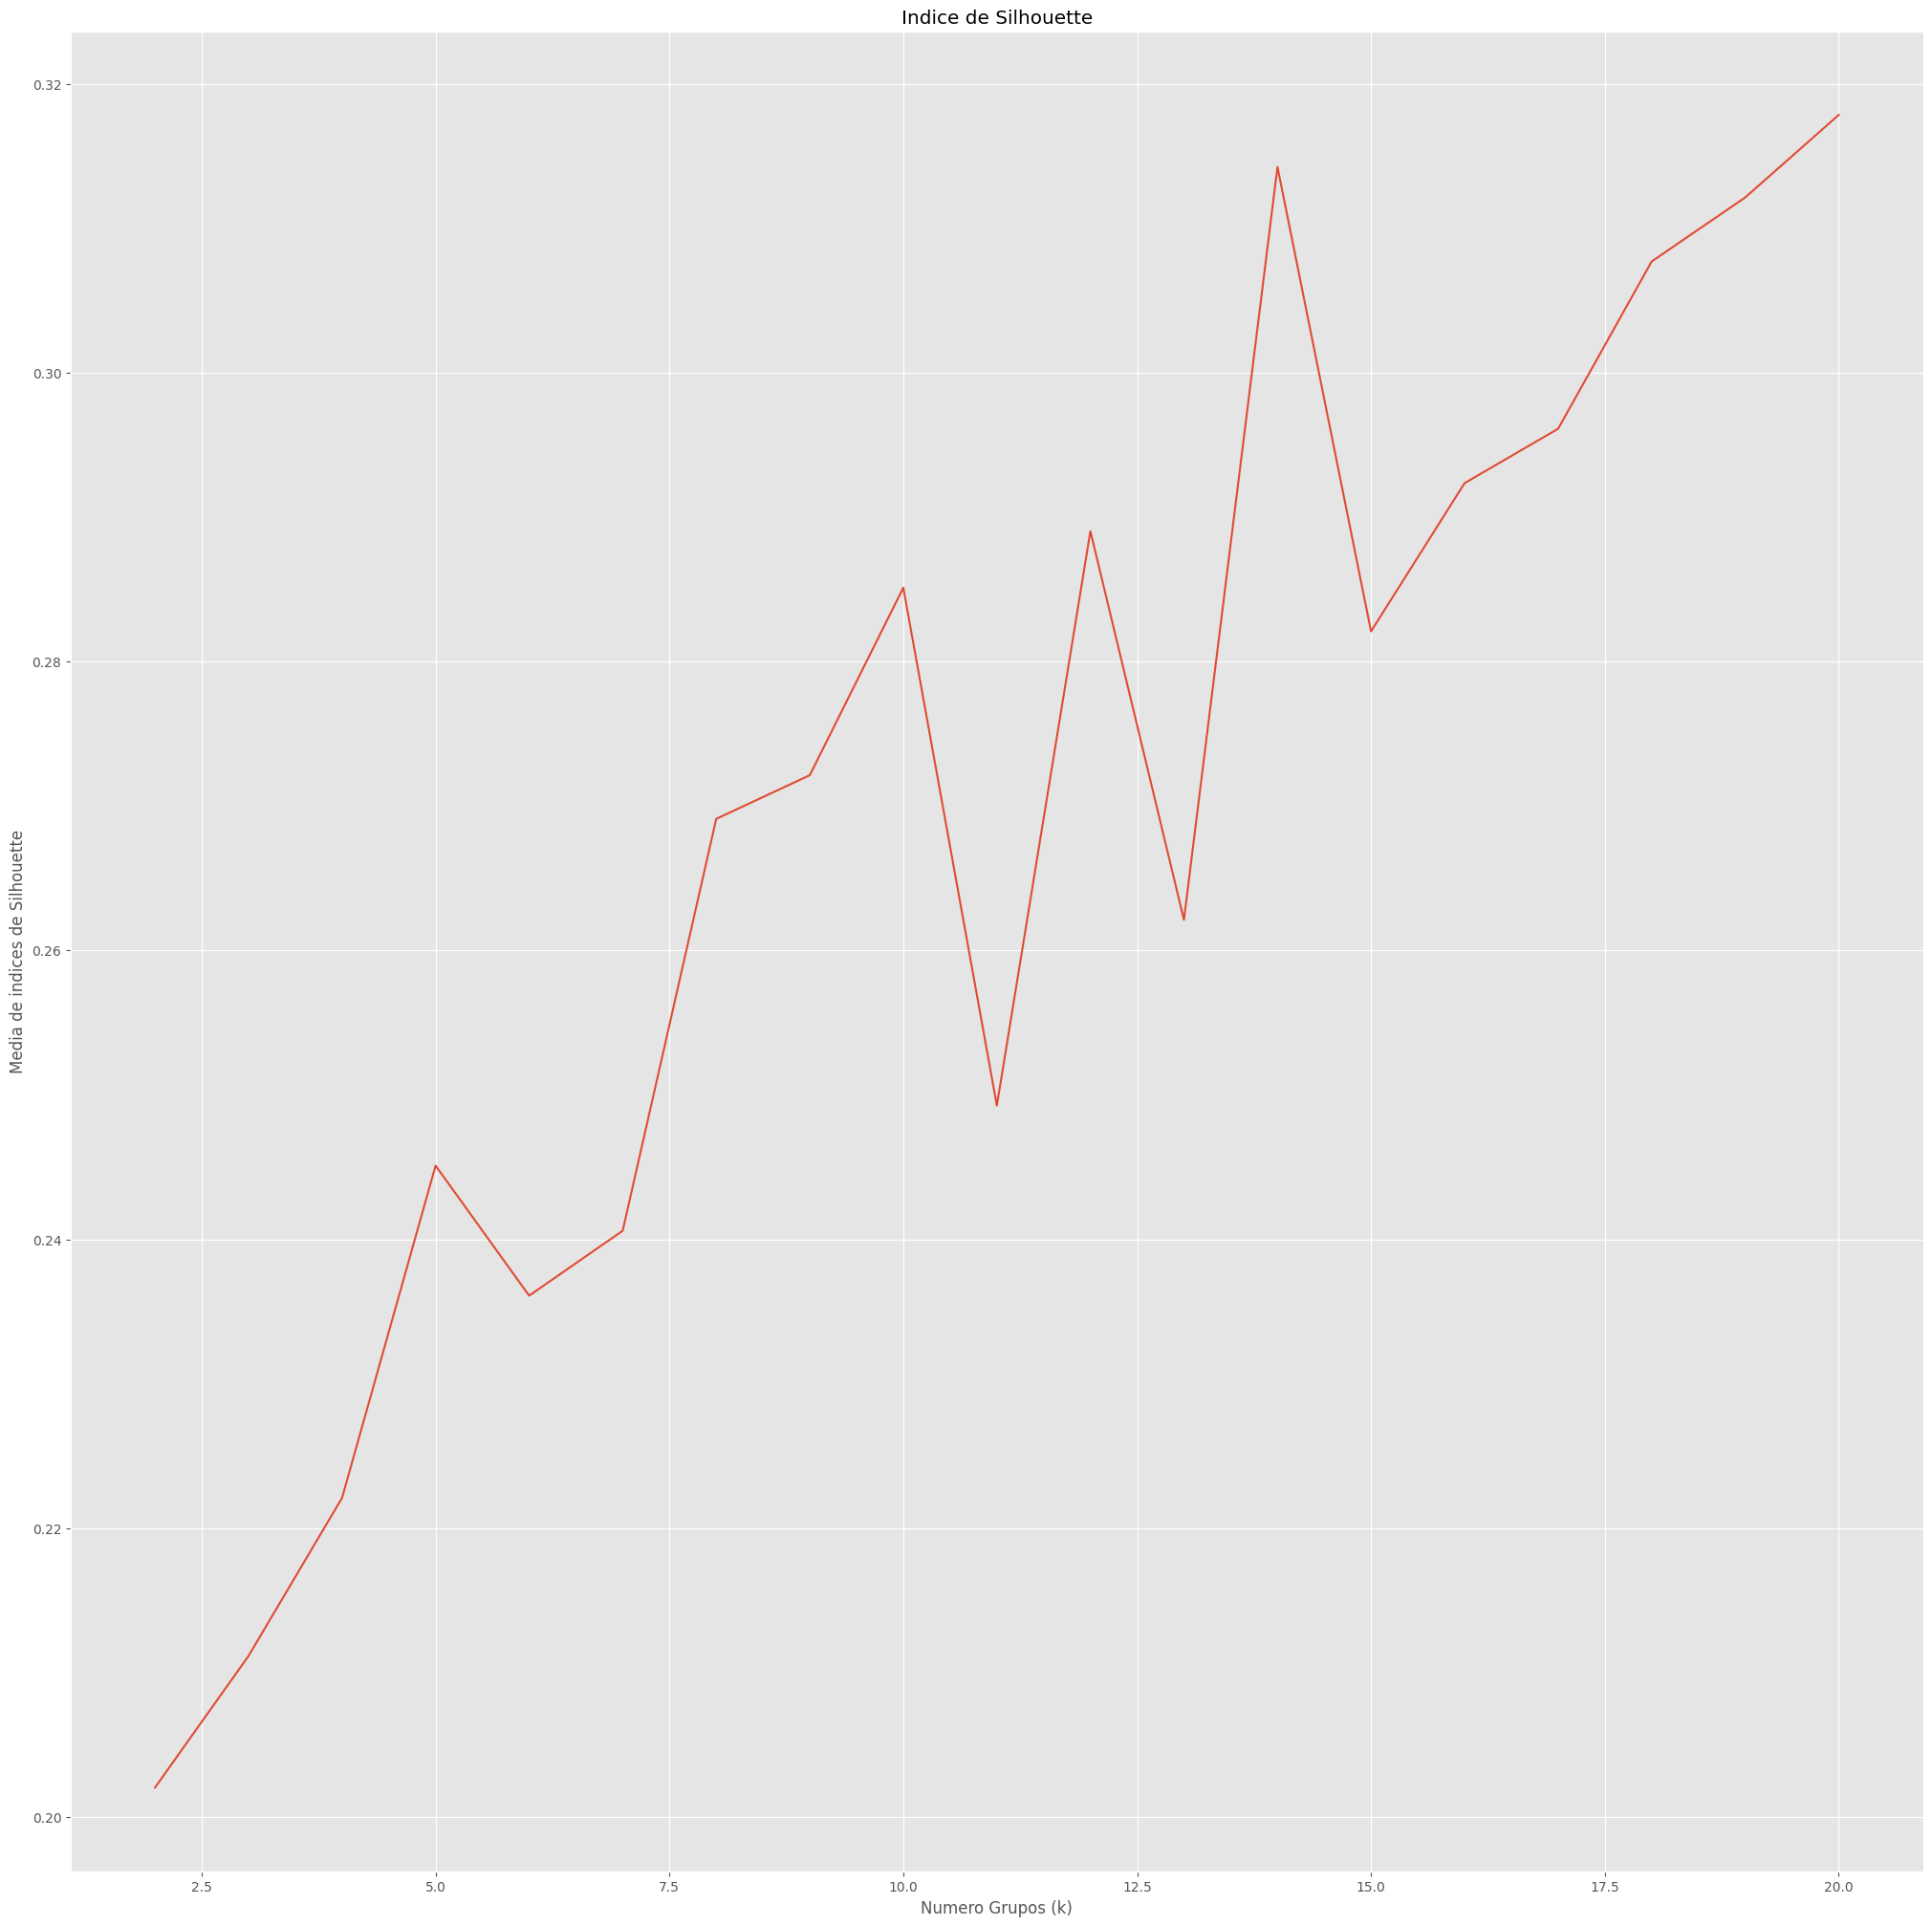

In [51]:
#Método de Silhouette
from sklearn.metrics import silhouette_score
numeroCluster = range(2,21)
valoresMedios = []

for n_clusters in numeroCluster:
  modeloKmeans = KMeans(n_clusters = n_clusters)
  labels = modeloKmeans.fit_predict(data_normRet)
  mediaSilhouette = silhouette_score(data_normRet, labels)
  valoresMedios.append(mediaSilhouette)

plt.plot(numeroCluster, valoresMedios)
plt.xlabel('Numero Grupos (k)')
plt.ylabel('Media de indices de Silhouette')
plt.title('Indice de Silhouette')

**Aplicar el clustering**

In [52]:
clustering = KMeans(n_clusters=4, max_iter=300)
clustering.fit(data_normRet)
clustering.cluster_centers_

array([[ 2.28203370e-01,  2.14792755e-01,  5.03701727e-01,
         5.19991451e-01,  4.28893484e-01,  2.60708331e-01,
         3.24031215e-01,  4.37951044e-01,  4.30454212e-01,
         1.22124533e-15,  1.00000000e+00,  1.00000000e+00,
        -1.94289029e-16,  1.88087774e-03,  2.19435737e-02,
         6.68338558e-01,  4.63949843e-02,  8.52664577e-02,
         1.27899687e-01,  4.82758621e-02,  1.25391850e-03,
         2.82131661e-02,  6.26959248e-04,  1.17093835e-17,
         2.00626959e-02,  9.49843260e-01,  6.24500451e-17,
         1.33226763e-15,  9.59247649e-02,  3.76175549e-03,
         9.00313480e-01],
       [ 2.27553119e-01,  2.04542051e-01,  4.73028743e-01,
         4.34964795e-01,  3.43210885e-01,  2.41027810e-01,
         2.78258207e-01,  2.32161346e-01,  3.17442725e-01,
         1.05471187e-15,  1.00000000e+00,  1.00000000e+00,
        -2.77555756e-16,  2.74160384e-03,  1.85058259e-02,
         6.49760110e-01,  4.79780672e-02,  8.36189171e-02,
         1.39136395e-01,  5.82

**Agregar a la clasificación original**

In [53]:
data_normRet['KMeans_Clusters'] = clustering.labels_
data_normRet.head(10)

Edad  Dias_Permanencia  Responsabilidad  Servicio_Cliente  \
0  0.281250          0.014815         0.872340          0.545455   
1  0.296875          0.765741         0.319149          0.227273   
2  0.343750          0.164815         0.680851          0.477273   
3  0.265625          0.193519         0.489362          0.454545   
4  0.375000          0.481481         0.829787          0.500000   
5  0.312500          0.005556         0.255319          0.545455   
6  0.281250          0.282407         0.553191          0.340909   
7  0.593750          0.752778         0.170213          0.954545   
8  0.625000          0.752778         0.914894          0.909091   
9  0.312500          0.752778         0.574468          0.340909   

   Madurez_Emocional  Productividad  Honestidad  Compromiso  Desempeño_Seguro  \
0           0.404255       0.191489    0.468085    0.425532          0.765957   
1           0.638298       0.276596    0.148936    0.042553          0.297872   
2           0.425532       0.255319    0.446809    0.404255          0.872340   
3           0.510638       0.340426    0.425532    0.127660          0.340426   
4           0.638298       1.000000    0.510638    0.829787          0.468085   
5           0.468085       0.319149    0.361702    0.361702          0.382979   
6           0.212766       0.127660    0.531915    0.255319          0.425532   
7           0.404255       0.425532    0.106383    0.212766          0.617021   
8           0.553191       0.000000    0.829787    1.000000          0.446809   
9           0.425532       0.127660    0.404255    1.000000          0.404255   

   Genero_F  ...  Tipo_Cargo_Gerentes y Directores  Tipo_Cargo_Jefes  \
0       0.0  ...                               0.0               0.0   
1       0.0  ...                               0.0               0.0   
2       0.0  ...                               0.0               0.0   
3       0.0  ...                               0.0               0.0   
4       1.0  ...                               0.0               0.0   
5       0.0  ...                               0.0               0.0   
6       1.0  ...                               1.0               0.0   
7       1.0  ...                               0.0               0.0   
8       0.0  ...                               0.0               0.0   
9       0.0  ...                               0.0               0.0   

   Tipo_Cargo_Líderes, Coordinadores y Supervisores  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
5                                               0.0   
6                                               0.0   
7                                               0.0   
8                                               0.0   
9                                               0.0   

   Tipo_Cargo_Operativos y Auxiliares  Tipo_Cargo_Practicante / Aprendiz  \
0                                 1.0                                0.0   
1                                 1.0                                0.0   
2                                 1.0                                0.0   
3                                 1.0                                0.0   
4                                 1.0                                0.0   
5                                 1.0                                0.0   
6                                 0.0                                0.0   
7                                 1.0                                0.0   
8                                 1.0                                0.0   
9                                 1.0                                0.0   

   ERI_DP  ERI_FP  ERI_NV  ERI_PS  KMeans_Clusters  
0     0.0     0.0     0.0     1.0                0  
1     0.0     0.0     0.

## Visualización

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)#Quiero un grafico de 2 dimenciones con el modelo pca 
pca_data=pca.fit_transform(data_normRet)#Aplico fit del modelo pca
pca_data_df= pd.DataFrame(data=pca_data, columns=['Componente1', 'Componente2'])#Creo un df con los valores de las 2 componentes principales
pca_add = pd.concat([pca_data_df, data_normRet[['KMeans_Clusters']]], axis=1)#indico los 2 objetos a concatenar y axis 1 para indicar que son columnas

pca_add

Componente1  Componente2  KMeans_Clusters
0       -1.546131     0.541627                0
1       -1.565026     0.411220                0
2       -1.550682     0.538970                0
3       -1.556145     0.447128                0
4        0.552758     1.057764                2
...           ...          ...              ...
5223     0.604576     1.064443                2
5224    -1.489710     0.425526                0
5225    -0.381320    -0.850888                1
5226    -1.493605     0.449030                0
5227    -0.401715    -0.840370                1

[5228 rows x 3 columns]

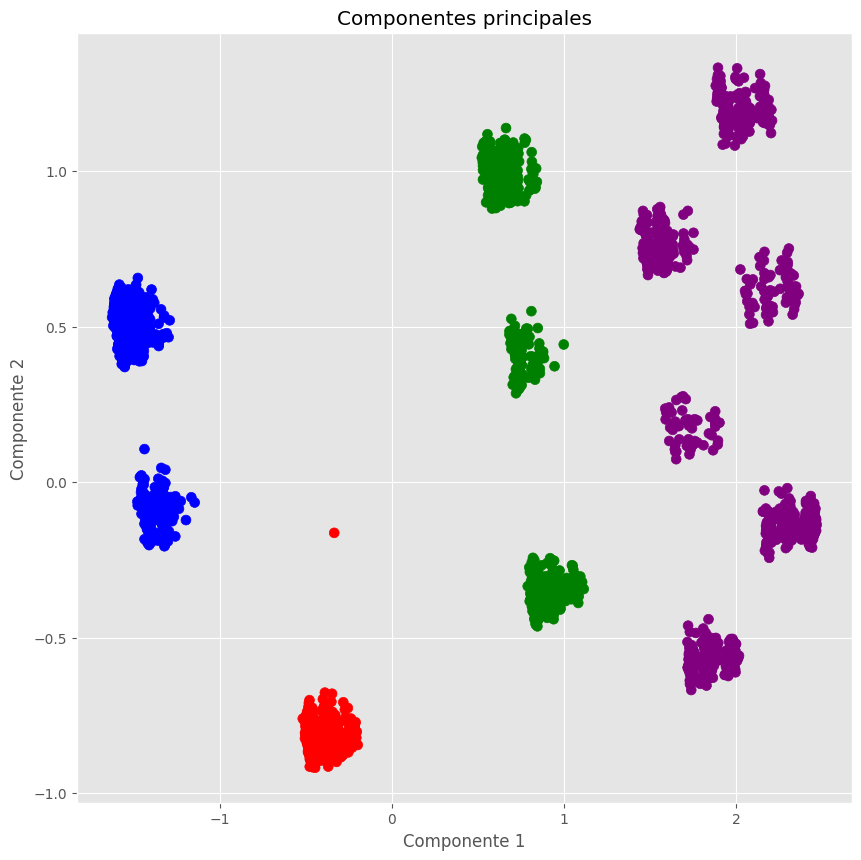

In [55]:
#Ayuda aqui no entiendo 
grafica=plt.figure(figsize=(10,10))
graf=grafica.add_subplot(1,1,1)
graf.set_xlabel("Componente 1")
graf.set_ylabel("Componente 2")
graf.set_title("Componentes principales")
colores=np.array(['blue','red','green','purple'])
graf.scatter(x=pca_add.Componente1,y=pca_add.Componente2,c=colores[pca_add.KMeans_Clusters],s=50)

## Desnormalizaremos

In [56]:
desnorm_clusterdfr=data_normRet*(data_prer.max()-data_prer.min()) + data_prer.min()
desnorm_clusterdfr.head()

Compromiso  Desempeño_Seguro  Dias_Permanencia  ERI_DP  ERI_FP  ERI_NV  \
0        21.0              37.0              16.0     0.0     0.0     0.0   
1         3.0              15.0             827.0     0.0     0.0     0.0   
2        20.0              42.0             178.0     0.0     0.0     0.0   
3         7.0              17.0             209.0     0.0     0.0     0.0   
4        40.0              23.0             520.0     0.0     0.0     0.0   

   ERI_PS  Edad  Genero_F  Genero_M  ...  Servicio_Cliente  \
0     1.0  36.0       0.0       1.0  ...              25.0   
1     1.0  37.0       0.0       1.0  ...              11.0   
2     1.0  40.0       0.0       1.0  ...              22.0   
3     1.0  35.0       0.0       1.0  ...              21.0   
4     1.0  42.0       1.0       0.0  ...              23.0   

   Tipo_Cargo_Analistas y Profesionales  Tipo_Cargo_Asistentes y Técnicos  \
0                                   0.0                               0.0   
1                                   0.0                               0.0   
2                                   0.0                               0.0   
3                                   0.0                               0.0   
4                                   0.0                               0.0   

   Tipo_Cargo_Gerentes y Directores  Tipo_Cargo_Jefes  \
0                               0.0               0.0   
1                               0.0               0.0   
2                               0.0               0.0   
3                               0.0               0.0   
4                               0.0               0.0   

   Tipo_Cargo_Líderes, Coordinadores y Supervisores  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   Tipo_Cargo_Operativos y Auxiliares  Tipo_Cargo_Practicante / Aprendiz  \
0                                 1.0                                0.0   
1                                 1.0                                0.0   
2                                 1.0                                0.0   
3                                 1.0                                0.0   
4                                 1.0                                0.0   

   Tpo_Contrato_Fijo  Tpo_Contrato_Indefinido  
0                1.0                      0.0  
1                1.0                      0.0  
2                1.0                      0.0  
3                1.0                      0.0  
4                1.0                      0.0  

[5 rows x 32 columns]